# Customers churn prediction: Bank dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Following libraries imported just for decision trees:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [2]:
# Importing Bank Data
bank = pd.read_csv('bank.csv')
bank

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
bank.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
bank = bank.drop('customer_id', axis = 1)
bank

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Algorithms to be used:
# Decision trees, kNN, Logistic regression

# Normalization dependent: kNN, logistic regression, Neural network
# Normalization independent: Decision trees, support vector classifier 

# Need to convert all categorical values into numerical values

# Gender can  be binarized, 0 and 1
# Country should be one-hot encoded

# Normalization independent algorithms

# Credit score to be normalized between 0 and 1
# balance should be normalized

# Normalization dependent algorithms

# credit score
# age
# tenure

## Processing Categorical Features

In [7]:
print(np.unique(bank['gender']))

['Female' 'Male']


In [8]:
# There are only two possible values for gender in the dataset, male is 1 and female is 0.

bank.loc[bank['gender'] == 'Male', 'gender'] = 1
bank.loc[bank['gender'] == 'Female', 'gender'] = 0

In [9]:
print(np.unique(bank['gender']))

[0 1]


In [10]:
bank = pd.get_dummies(bank, columns=['country'], dtype=int)

In [11]:
bank

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


## Modelling correlation and creating input and target variables

In [12]:
features = bank.drop('churn', axis=1).to_numpy()
targets = bank['churn'].to_numpy()

features = features.astype(float)
targets = targets.astype(int)

print(features.shape, targets.shape)

(10000, 12) (10000,)


C:\Users\Uneeba Irfan\AppData\Local\Temp\ipykernel_9528\4014893990.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(bank.corr(), vmin=-1, vmax=1, annot=True)


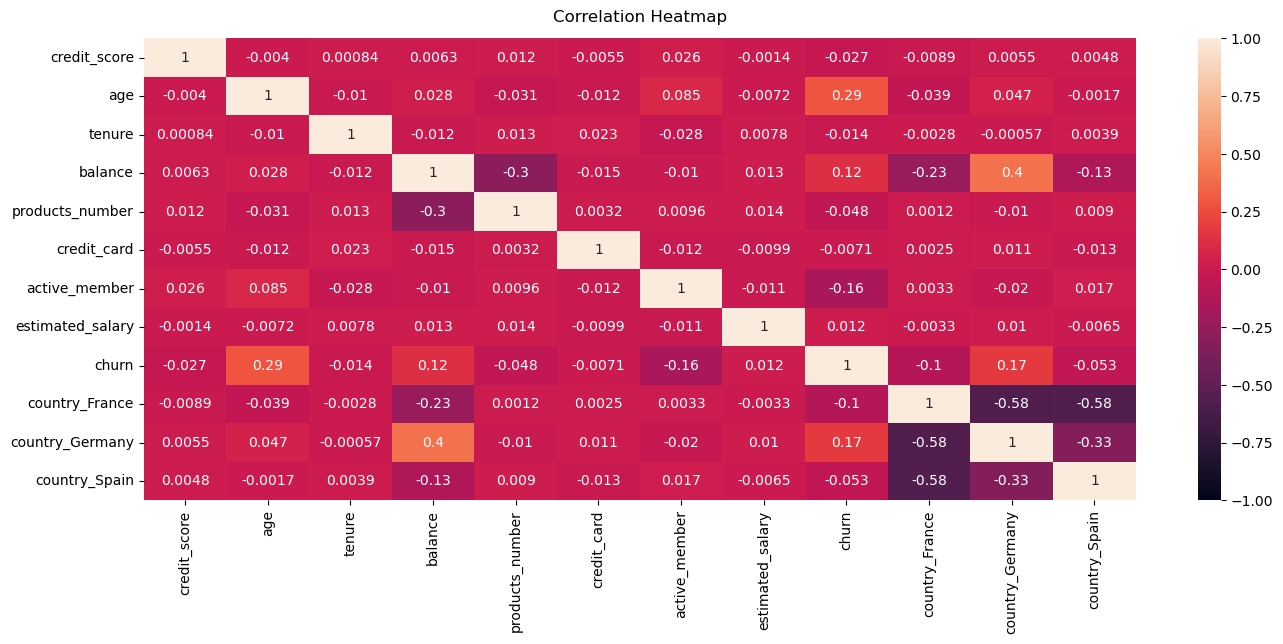

In [13]:
# We are using 12 features and have 10000 data examples.

# Plotting heatmap of correlation matrix for dataset

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(bank.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [14]:
# As seen above, credit score, tenure, product_number, credit-card, estimated_salary and being from spain have poor correlation 
# churn. Age is the most correlated with churn demonstrating that higher age might demonstrate a higher chance of churn.

## Creating training and testing datasets

In [15]:
# Using sklearn

# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
# print(x_train.shape, x_test.shape)

# Using numpy
# where x is input and y is output

index_arr = np.cumsum(np.ones(10000, dtype=int))-1
np.random.shuffle(index_arr)
features, targets = features[index_arr], targets[index_arr]
test_size = 0.3

x_train, y_train = features[:int(10000*(1-test_size))], targets[:int(10000*(1-test_size))]
x_test, y_test = features[int(10000*(1-test_size)):], targets[int(10000*(1-test_size)):]

print(x_train.shape, x_test.shape)

def TrainTestSplit(features, targets, test_size):
    index_arr = np.cumsum(np.ones(len(features), dtype=int)) - 1
    np.random.shuffle(index_arr)
    features, targets = features[index_arr], targets[index_arr]
    
    x_train, y_train = features[:int(len(features)*(1-test_size))], targets[:int(len(features)*(1-test_size))]
    x_test, y_test = features[int(len(features)*(1-test_size)):], targets[int(len(features)*(1-test_size)):]
    
    return x_train, x_test, y_train, y_test

(7000, 12) (3000, 12)


## Normalizing data

In [16]:
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    data = (data - mean)/std
    return data

norm_bank = bank.copy()
print(np.max(norm_bank['credit_score']), np.max(norm_bank['age']), np.max(norm_bank['tenure']))

850 92 10


In [17]:
# Max credit score is 850.
# Setting max age to 100.
# Setting max tenure to 10.

norm_bank['credit_score'] = norm_bank['credit_score']/850
norm_bank['age'] = norm_bank['age']/100
norm_bank['tenure'] = norm_bank['tenure']/10
norm_bank['balance'] = normalize(norm_bank['balance'])
norm_bank['estimated_salary'] = normalize(norm_bank['estimated_salary'])

In [18]:
norm_bank

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,0.728235,0,0.42,0.2,-1.225848,1,1,1,0.021886,1,1,0,0
1,0.715294,0,0.41,0.1,0.117350,1,0,1,0.216534,0,0,0,1
2,0.590588,0,0.42,0.8,1.333053,3,1,0,0.240687,1,1,0,0
3,0.822353,0,0.39,0.1,-1.225848,2,0,0,-0.108918,0,1,0,0
4,1.000000,0,0.43,0.2,0.785728,1,1,1,-0.365276,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.907059,1,0.39,0.5,-1.225848,2,1,0,-0.066419,0,1,0,0
9996,0.607059,1,0.35,1.0,-0.306379,1,1,1,0.027988,0,1,0,0
9997,0.834118,0,0.36,0.7,-1.225848,1,0,1,-1.008643,1,1,0,0
9998,0.908235,1,0.42,0.3,-0.022608,2,1,0,-0.125231,1,0,1,0


## k NEAREST CLASSIFICATION


#### Pairwise distances

In [19]:
# the pairwise distance is computed considering all the rows of from-data against all the rows of y
def pairwise_distances(from_data, to_data):
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2,axis=2))


In [20]:
distances = pairwise_distances(x_test, x_train)
no_of_classes = 1 + np.max(y_train)
sorted_indices = np.argsort(distances, axis=1)


In [21]:
no_of_points= len(x_train)
no_of_inputs = len(x_test)

# we can use broadcast_to to create, for each data_input, a row with all the training outputs
new_array_to_sort = np.broadcast_to(y_train,(no_of_inputs, no_of_points))
print (new_array_to_sort)
print ('----')

# now we can sort them using their distances
sorted_labels=np.take_along_axis(new_array_to_sort,sorted_indices, 1)
print (sorted_labels)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]]
----
[[1 0 0 ... 1 1 1]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [22]:
 # we need to speficy the number of K to consider
no_of_neighbours=1


# we can do the classification!
predicted_labels=np.zeros(no_of_inputs,int)
for id_input in range(no_of_inputs): # for each input we compute the average of label of the k closest
    probability_labels = np.zeros(no_of_classes,float)
    # this is an array that stores the probabilty that each input is member of a particular class
    # by looking that the fraction of k neighbors that are in the class
    for id_neighbor in range(0,no_of_neighbours):
        label=sorted_labels[id_input][id_neighbor] # this is the label of the neighbors
        probability_labels[label] += 1./no_of_neighbours

    predicted_labels[id_input]=np.argmax(probability_labels)
    
print (predicted_labels)

[1 0 0 ... 0 0 1]


In [23]:
# we can put all together!
def nearest_neighbour_classification(testing_inputs, training_inputs,training_outputs, no_of_neighbours):
    
    # first thing is to compute pairwise distances
    distances = pairwise_distances(testing_inputs, training_inputs)
    
    no_of_classes = 1 + np.max(training_outputs)
    sorted_indices = np.argsort(distances, axis=1)
    
    no_of_inputs = len(testing_inputs) # these are the data that we are trying to classify
    no_of_points = len(training_inputs)
    
    new_array_to_sort = np.broadcast_to(training_outputs,(no_of_inputs, no_of_points))
    sorted_labels = np.take_along_axis(new_array_to_sort,sorted_indices, 1)
    
    predicted_labels=np.zeros(no_of_inputs,int)
    for id_input in range(no_of_inputs):
        
        probability_labels=np.zeros(no_of_classes,float)
        
        for id_neighbor in range(0,no_of_neighbours):
            probability_labels[sorted_labels[id_input][id_neighbor]]+=1./no_of_neighbours

        predicted_labels[id_input]=np.argmax(probability_labels)
    
    
    return predicted_labels

In [24]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels # this returns an array made of true and false 
    return np.mean(equal_labels) # the average is how many true we have

In [25]:
def KFold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split


def KFold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation,
                           missclassification_evaluation,knn):
    
    data_size = len(data_inputs)
    indexes_split = KFold_split(data_size, K)

    average_accuracy = 0
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes],knn)
        
        accuracy = missclassification_evaluation(predicted_labels,
                                              data_outputs[indexes_split[i]])
        average_accuracy += accuracy / K
        
    error = 1.-average_accuracy
    return error

In [26]:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

In [27]:
K=5
data_size = len(x_test)
Knn = list(range(1,21,1))


evaluation = lambda x_test,x_train, y_train, k: nearest_neighbour_classification(x_test,x_train, y_train,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(x_test,y_test, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

In [28]:
print("Optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

Optimal number of neighbours one needs to consider is equal to 20. 
In this case the prediction error would be as little as 20.67%.


In [30]:
from numpy.testing import assert_array_almost_equal, assert_array_equal

assert_array_almost_equal(optimal_no_of_neighbours, 20)

### Confusion matrix to visualize the k nearest classification

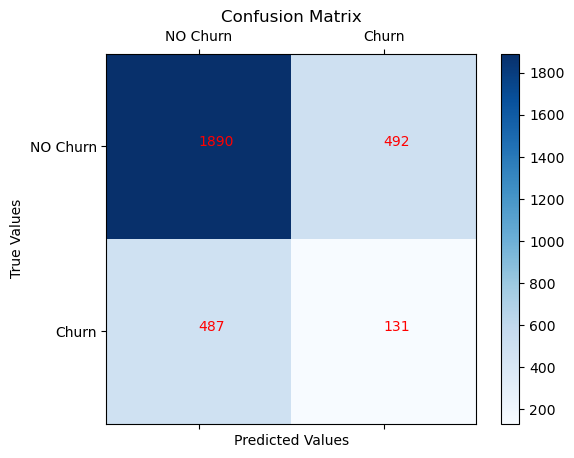

In [31]:
# Where 'y_test' are the true values and 'predicted_labels' is the predicted values
c_matrix = np.zeros((2, 2), dtype=int)

for true_val, predicted_val in zip(y_test, predicted_labels):
    c_matrix[true_val, predicted_val] += 1

fig, ax = plt.subplots()

col = ax.matshow(c_matrix, cmap='Blues')
plt.xticks([0, 1], ['NO Churn', 'Churn'])
plt.yticks([0, 1], ['NO Churn', 'Churn'])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')

# Values for each box in the matrix
for k in range(2):
    for j in range(2):
        plt.text(j, k, str(c_matrix[k, j]), color='r')

plt.colorbar(col)
plt.show()


## Logistic Regression

In [32]:
def logistic_function(x):
    return 1/(1+np.exp(-x.astype(float)))

In [33]:
def cross_entropy_loss(true_labels, predictions):
    loss = np.mean(-true_labels*np.log(predictions) - (1-true_labels)*np.log(1-predictions))
    return loss

In [34]:
def gradient_CE_loss(true_labels, predictions, inputs):
    # true_labels: (m, 1)
    # predictions: (m, 1)
    # inputs: (m, features+1)
    # gradients = inputs.T @ (predictions-true_labels): (features+1, 1)
    gradients = inputs.T @ (predictions-true_labels)
    return gradients

In [35]:
def update_weights(initial_weights, gradients, learning_rate):
    # initial_weights: (features+1, 1)
    # gradients: (features+1, 1)
    return initial_weights - learning_rate*gradients

In [36]:
def logistic_regression(inputs, true_labels, initial_weights, learning_rate, n_iterations):
    # inputs: (m, features)
    # true_labels: (m, 1)
    # initial_weights (features+1, 1)
    
    # add 1 to inputs
    weights = [initial_weights]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    loss_history = []
    for n in range(1, n_iterations+1):
#         print(inputs.shape)
        predictions = logistic_function(inputs @ weights[-1])
        loss = cross_entropy_loss(true_labels, predictions)
        print(f"Loss in iteration {n}: {loss}")
        loss_history.append(loss)
        gradients = gradient_CE_loss(true_labels, predictions, inputs)
        weights.append(update_weights(weights[-1], gradients, learning_rate))
    
    return weights[-1], loss_history

In [37]:
inputs = norm_bank.drop('churn', axis=1).to_numpy()
true_labels = norm_bank['churn'].to_numpy().reshape(-1, 1)

train_inputs, test_inputs, train_true_labels, test_true_labels = TrainTestSplit(inputs, true_labels, test_size=0.3)

train_inputs_0 = train_inputs[train_true_labels.reshape(-1) == 0]
train_inputs_1 = train_inputs[train_true_labels.reshape(-1) == 1]
train_inputs = np.concatenate((train_inputs_1, train_inputs_0[:len(train_inputs_1)]), axis=0)
train_true_labels = np.concatenate((np.ones((len(train_inputs_1), 1)), np.zeros((len(train_inputs_1), 1))))
print(train_inputs.shape, train_true_labels.shape)

initial_weights = np.random.random((inputs.shape[1]+1, 1))
learning_rate = 0.00015

logistic_regression_weights, loss_history = logistic_regression(train_inputs, train_true_labels, initial_weights, learning_rate, 20000)

(2888, 12) (2888, 1)
Loss in iteration 1: 1.9960237251294815
Loss in iteration 2: 1.450292091248068
Loss in iteration 3: 1.0502543574504508
Loss in iteration 4: 0.8392403041886037
Loss in iteration 5: 0.7569985575254535
Loss in iteration 6: 0.7260114724901697
Loss in iteration 7: 0.7106976751944748
Loss in iteration 8: 0.7002899224538265
Loss in iteration 9: 0.6919356816785034
Loss in iteration 10: 0.6848483771101572
Loss in iteration 11: 0.6787466964178195
Loss in iteration 12: 0.6734744637099597
Loss in iteration 13: 0.6689127271871069
Loss in iteration 14: 0.6649601398395623
Loss in iteration 15: 0.6615284021778886
Loss in iteration 16: 0.658540732378452
Loss in iteration 17: 0.6559308184572497
Loss in iteration 18: 0.6536417897669005
Loss in iteration 19: 0.6516251711034564
Loss in iteration 20: 0.6498398541744289
Loss in iteration 21: 0.6482511214672613
Loss in iteration 22: 0.646829746223625
Loss in iteration 23: 0.6455511813019288
Loss in iteration 24: 0.6443948413055621
Loss in

Loss in iteration 223: 0.6132141471867213
Loss in iteration 224: 0.6131504207003726
Loss in iteration 225: 0.6130868633328818
Loss in iteration 226: 0.6130234741347637
Loss in iteration 227: 0.6129602521687167
Loss in iteration 228: 0.6128971965093657
Loss in iteration 229: 0.6128343062430105
Loss in iteration 230: 0.6127715804673853
Loss in iteration 231: 0.6127090182914217
Loss in iteration 232: 0.6126466188350221
Loss in iteration 233: 0.6125843812288372
Loss in iteration 234: 0.6125223046140515
Loss in iteration 235: 0.6124603881421742
Loss in iteration 236: 0.6123986309748365
Loss in iteration 237: 0.6123370322835944
Loss in iteration 238: 0.6122755912497375
Loss in iteration 239: 0.6122143070641024
Loss in iteration 240: 0.6121531789268915
Loss in iteration 241: 0.6120922060474975
Loss in iteration 242: 0.6120313876443313
Loss in iteration 243: 0.6119707229446558
Loss in iteration 244: 0.6119102111844233
Loss in iteration 245: 0.6118498516081178
Loss in iteration 246: 0.611789643

Loss in iteration 434: 0.6025924688698726
Loss in iteration 435: 0.6025527070839951
Loss in iteration 436: 0.602513025680948
Loss in iteration 437: 0.6024734244599518
Loss in iteration 438: 0.602433903221055
Loss in iteration 439: 0.6023944617651275
Loss in iteration 440: 0.6023550998938539
Loss in iteration 441: 0.602315817409727
Loss in iteration 442: 0.6022766141160398
Loss in iteration 443: 0.6022374898168805
Loss in iteration 444: 0.6021984443171249
Loss in iteration 445: 0.6021594774224304
Loss in iteration 446: 0.6021205889392295
Loss in iteration 447: 0.6020817786747236
Loss in iteration 448: 0.6020430464368767
Loss in iteration 449: 0.6020043920344088
Loss in iteration 450: 0.6019658152767912
Loss in iteration 451: 0.6019273159742389
Loss in iteration 452: 0.6018888939377054
Loss in iteration 453: 0.601850548978877
Loss in iteration 454: 0.601812280910167
Loss in iteration 455: 0.6017740895447098
Loss in iteration 456: 0.6017359746963546
Loss in iteration 457: 0.60169793617966

Loss in iteration 654: 0.5954887657393714
Loss in iteration 655: 0.5954628736218681
Loss in iteration 656: 0.5954370304936768
Loss in iteration 657: 0.5954112362513575
Loss in iteration 658: 0.5953854907917222
Loss in iteration 659: 0.5953597940118341
Loss in iteration 660: 0.5953341458090072
Loss in iteration 661: 0.5953085460808044
Loss in iteration 662: 0.5952829947250381
Loss in iteration 663: 0.5952574916397677
Loss in iteration 664: 0.5952320367233006
Loss in iteration 665: 0.5952066298741898
Loss in iteration 666: 0.5951812709912345
Loss in iteration 667: 0.5951559599734778
Loss in iteration 668: 0.5951306967202074
Loss in iteration 669: 0.5951054811309534
Loss in iteration 670: 0.5950803131054889
Loss in iteration 671: 0.5950551925438282
Loss in iteration 672: 0.5950301193462263
Loss in iteration 673: 0.5950050934131785
Loss in iteration 674: 0.594980114645419
Loss in iteration 675: 0.5949551829439205
Loss in iteration 676: 0.5949302982098936
Loss in iteration 677: 0.5949054603

Loss in iteration 875: 0.5907954245390298
Loss in iteration 876: 0.5907782265316435
Loss in iteration 877: 0.5907610596392264
Loss in iteration 878: 0.5907439237995274
Loss in iteration 879: 0.5907268189504324
Loss in iteration 880: 0.5907097450299649
Loss in iteration 881: 0.5906927019762845
Loss in iteration 882: 0.590675689727688
Loss in iteration 883: 0.5906587082226081
Loss in iteration 884: 0.5906417573996132
Loss in iteration 885: 0.5906248371974073
Loss in iteration 886: 0.5906079475548296
Loss in iteration 887: 0.590591088410854
Loss in iteration 888: 0.5905742597045889
Loss in iteration 889: 0.590557461375277
Loss in iteration 890: 0.5905406933622946
Loss in iteration 891: 0.5905239556051521
Loss in iteration 892: 0.5905072480434925
Loss in iteration 893: 0.5904905706170916
Loss in iteration 894: 0.5904739232658585
Loss in iteration 895: 0.5904573059298337
Loss in iteration 896: 0.5904407185491899
Loss in iteration 897: 0.5904241610642316
Loss in iteration 898: 0.590407633415

Loss in iteration 1085: 0.5877817762352269
Loss in iteration 1086: 0.5877699317697322
Loss in iteration 1087: 0.5877581079179867
Loss in iteration 1088: 0.5877463046404613
Loss in iteration 1089: 0.5877345218977112
Loss in iteration 1090: 0.5877227596503752
Loss in iteration 1091: 0.5877110178591747
Loss in iteration 1092: 0.5876992964849144
Loss in iteration 1093: 0.5876875954884819
Loss in iteration 1094: 0.5876759148308474
Loss in iteration 1095: 0.5876642544730635
Loss in iteration 1096: 0.5876526143762649
Loss in iteration 1097: 0.5876409945016688
Loss in iteration 1098: 0.5876293948105739
Loss in iteration 1099: 0.5876178152643605
Loss in iteration 1100: 0.5876062558244911
Loss in iteration 1101: 0.5875947164525086
Loss in iteration 1102: 0.5875831971100376
Loss in iteration 1103: 0.5875716977587834
Loss in iteration 1104: 0.5875602183605322
Loss in iteration 1105: 0.5875487588771505
Loss in iteration 1106: 0.5875373192705857
Loss in iteration 1107: 0.5875258995028649
Loss in ite

Loss in iteration 1280: 0.5858183972123141
Loss in iteration 1281: 0.58580991617843
Loss in iteration 1282: 0.5858014494218757
Loss in iteration 1283: 0.585792996916288
Loss in iteration 1284: 0.585784558635357
Loss in iteration 1285: 0.5857761345528267
Loss in iteration 1286: 0.5857677246424946
Loss in iteration 1287: 0.585759328878211
Loss in iteration 1288: 0.5857509472338798
Loss in iteration 1289: 0.5857425796834579
Loss in iteration 1290: 0.5857342262009549
Loss in iteration 1291: 0.5857258867604337
Loss in iteration 1292: 0.5857175613360094
Loss in iteration 1293: 0.5857092499018499
Loss in iteration 1294: 0.5857009524321756
Loss in iteration 1295: 0.5856926689012594
Loss in iteration 1296: 0.5856843992834259
Loss in iteration 1297: 0.5856761435530524
Loss in iteration 1298: 0.585667901684568
Loss in iteration 1299: 0.5856596736524535
Loss in iteration 1300: 0.5856514594312417
Loss in iteration 1301: 0.5856432589955171
Loss in iteration 1302: 0.5856350723199155
Loss in iteration

Loss in iteration 1484: 0.5843505852403299
Loss in iteration 1485: 0.5843445380636999
Loss in iteration 1486: 0.584338500748621
Loss in iteration 1487: 0.5843324732775518
Loss in iteration 1488: 0.584326455632985
Loss in iteration 1489: 0.584320447797448
Loss in iteration 1490: 0.5843144497535019
Loss in iteration 1491: 0.5843084614837416
Loss in iteration 1492: 0.5843024829707969
Loss in iteration 1493: 0.5842965141973309
Loss in iteration 1494: 0.5842905551460407
Loss in iteration 1495: 0.584284605799657
Loss in iteration 1496: 0.5842786661409446
Loss in iteration 1497: 0.5842727361527019
Loss in iteration 1498: 0.5842668158177604
Loss in iteration 1499: 0.5842609051189855
Loss in iteration 1500: 0.5842550040392761
Loss in iteration 1501: 0.5842491125615642
Loss in iteration 1502: 0.5842432306688152
Loss in iteration 1503: 0.5842373583440277
Loss in iteration 1504: 0.5842314955702335
Loss in iteration 1505: 0.5842256423304973
Loss in iteration 1506: 0.5842197986079168
Loss in iterati

Loss in iteration 1679: 0.583338421893741
Loss in iteration 1680: 0.5833340037135152
Loss in iteration 1681: 0.5833295925425511
Loss in iteration 1682: 0.5833251883687888
Loss in iteration 1683: 0.5833207911801909
Loss in iteration 1684: 0.5833164009647428
Loss in iteration 1685: 0.5833120177104527
Loss in iteration 1686: 0.5833076414053512
Loss in iteration 1687: 0.5833032720374917
Loss in iteration 1688: 0.5832989095949497
Loss in iteration 1689: 0.5832945540658232
Loss in iteration 1690: 0.5832902054382331
Loss in iteration 1691: 0.583285863700322
Loss in iteration 1692: 0.5832815288402552
Loss in iteration 1693: 0.5832772008462201
Loss in iteration 1694: 0.5832728797064265
Loss in iteration 1695: 0.5832685654091061
Loss in iteration 1696: 0.5832642579425129
Loss in iteration 1697: 0.583259957294923
Loss in iteration 1698: 0.5832556634546343
Loss in iteration 1699: 0.583251376409967
Loss in iteration 1700: 0.583247096149263
Loss in iteration 1701: 0.5832428226608861
Loss in iteratio

Loss in iteration 1887: 0.582554094773924
Loss in iteration 1888: 0.5825509052274154
Loss in iteration 1889: 0.5825477206087226
Loss in iteration 1890: 0.5825445409096393
Loss in iteration 1891: 0.5825413661219742
Loss in iteration 1892: 0.5825381962375511
Loss in iteration 1893: 0.5825350312482084
Loss in iteration 1894: 0.5825318711457993
Loss in iteration 1895: 0.582528715922192
Loss in iteration 1896: 0.5825255655692693
Loss in iteration 1897: 0.5825224200789285
Loss in iteration 1898: 0.5825192794430821
Loss in iteration 1899: 0.5825161436536568
Loss in iteration 1900: 0.582513012702594
Loss in iteration 1901: 0.5825098865818501
Loss in iteration 1902: 0.5825067652833955
Loss in iteration 1903: 0.5825036487992156
Loss in iteration 1904: 0.5825005371213101
Loss in iteration 1905: 0.582497430241693
Loss in iteration 1906: 0.5824943281523933
Loss in iteration 1907: 0.5824912308454537
Loss in iteration 1908: 0.5824881383129322
Loss in iteration 1909: 0.5824850505469004
Loss in iterati

Loss in iteration 2081: 0.5820185361629865
Loss in iteration 2082: 0.5820161652674032
Loss in iteration 2083: 0.5820137979543782
Loss in iteration 2084: 0.5820114342181099
Loss in iteration 2085: 0.5820090740528064
Loss in iteration 2086: 0.5820067174526866
Loss in iteration 2087: 0.5820043644119787
Loss in iteration 2088: 0.5820020149249218
Loss in iteration 2089: 0.5819996689857646
Loss in iteration 2090: 0.5819973265887661
Loss in iteration 2091: 0.5819949877281957
Loss in iteration 2092: 0.5819926523983321
Loss in iteration 2093: 0.5819903205934647
Loss in iteration 2094: 0.5819879923078927
Loss in iteration 2095: 0.5819856675359252
Loss in iteration 2096: 0.5819833462718813
Loss in iteration 2097: 0.5819810285100904
Loss in iteration 2098: 0.5819787142448913
Loss in iteration 2099: 0.581976403470633
Loss in iteration 2100: 0.5819740961816745
Loss in iteration 2101: 0.5819717923723844
Loss in iteration 2102: 0.5819694920371415
Loss in iteration 2103: 0.5819671951703344
Loss in iter

Loss in iteration 2289: 0.5815946542749815
Loss in iteration 2290: 0.5815929173511719
Loss in iteration 2291: 0.5815911829964725
Loss in iteration 2292: 0.5815894512068343
Loss in iteration 2293: 0.5815877219782152
Loss in iteration 2294: 0.5815859953065804
Loss in iteration 2295: 0.5815842711879017
Loss in iteration 2296: 0.5815825496181577
Loss in iteration 2297: 0.5815808305933338
Loss in iteration 2298: 0.5815791141094224
Loss in iteration 2299: 0.5815774001624227
Loss in iteration 2300: 0.5815756887483404
Loss in iteration 2301: 0.5815739798631884
Loss in iteration 2302: 0.5815722735029859
Loss in iteration 2303: 0.5815705696637595
Loss in iteration 2304: 0.5815688683415419
Loss in iteration 2305: 0.5815671695323729
Loss in iteration 2306: 0.5815654732322989
Loss in iteration 2307: 0.581563779437373
Loss in iteration 2308: 0.5815620881436551
Loss in iteration 2309: 0.5815603993472116
Loss in iteration 2310: 0.5815587130441157
Loss in iteration 2311: 0.5815570292304474
Loss in iter

Loss in iteration 2485: 0.581298692552558
Loss in iteration 2486: 0.5812973896045264
Loss in iteration 2487: 0.5812960885492684
Loss in iteration 2488: 0.5812947893838699
Loss in iteration 2489: 0.581293492105421
Loss in iteration 2490: 0.5812921967110178
Loss in iteration 2491: 0.5812909031977601
Loss in iteration 2492: 0.5812896115627529
Loss in iteration 2493: 0.581288321803106
Loss in iteration 2494: 0.5812870339159341
Loss in iteration 2495: 0.5812857478983562
Loss in iteration 2496: 0.5812844637474968
Loss in iteration 2497: 0.5812831814604842
Loss in iteration 2498: 0.5812819010344522
Loss in iteration 2499: 0.5812806224665392
Loss in iteration 2500: 0.5812793457538882
Loss in iteration 2501: 0.5812780708936468
Loss in iteration 2502: 0.5812767978829674
Loss in iteration 2503: 0.5812755267190072
Loss in iteration 2504: 0.581274257398928
Loss in iteration 2505: 0.5812729899198964
Loss in iteration 2506: 0.5812717242790834
Loss in iteration 2507: 0.5812704604736648
Loss in iterati

Loss in iteration 2678: 0.5810791078851931
Loss in iteration 2679: 0.5810781214792895
Loss in iteration 2680: 0.5810771364836484
Loss in iteration 2681: 0.5810761528961437
Loss in iteration 2682: 0.5810751707146518
Loss in iteration 2683: 0.5810741899370535
Loss in iteration 2684: 0.5810732105612324
Loss in iteration 2685: 0.5810722325850756
Loss in iteration 2686: 0.5810712560064737
Loss in iteration 2687: 0.5810702808233207
Loss in iteration 2688: 0.581069307033514
Loss in iteration 2689: 0.5810683346349542
Loss in iteration 2690: 0.5810673636255457
Loss in iteration 2691: 0.5810663940031957
Loss in iteration 2692: 0.5810654257658151
Loss in iteration 2693: 0.5810644589113183
Loss in iteration 2694: 0.5810634934376226
Loss in iteration 2695: 0.5810625293426491
Loss in iteration 2696: 0.5810615666243222
Loss in iteration 2697: 0.581060605280569
Loss in iteration 2698: 0.581059645309321
Loss in iteration 2699: 0.581058686708512
Loss in iteration 2700: 0.5810577294760799
Loss in iterati

Loss in iteration 2891: 0.5808977335696167
Loss in iteration 2892: 0.580897004516767
Loss in iteration 2893: 0.5808962764899744
Loss in iteration 2894: 0.5808955494877241
Loss in iteration 2895: 0.580894823508503
Loss in iteration 2896: 0.5808940985508005
Loss in iteration 2897: 0.5808933746131085
Loss in iteration 2898: 0.5808926516939213
Loss in iteration 2899: 0.5808919297917351
Loss in iteration 2900: 0.5808912089050491
Loss in iteration 2901: 0.5808904890323644
Loss in iteration 2902: 0.5808897701721848
Loss in iteration 2903: 0.580889052323016
Loss in iteration 2904: 0.5808883354833664
Loss in iteration 2905: 0.5808876196517467
Loss in iteration 2906: 0.5808869048266698
Loss in iteration 2907: 0.580886191006651
Loss in iteration 2908: 0.5808854781902079
Loss in iteration 2909: 0.5808847663758604
Loss in iteration 2910: 0.580884055562131
Loss in iteration 2911: 0.580883345747544
Loss in iteration 2912: 0.5808826369306264
Loss in iteration 2913: 0.5808819291099075
Loss in iteration

Loss in iteration 3110: 0.5807601542041196
Loss in iteration 3111: 0.580759617445302
Loss in iteration 3112: 0.580759081431157
Loss in iteration 3113: 0.5807585461606057
Loss in iteration 3114: 0.5807580116325709
Loss in iteration 3115: 0.5807574778459772
Loss in iteration 3116: 0.5807569447997504
Loss in iteration 3117: 0.5807564124928185
Loss in iteration 3118: 0.5807558809241107
Loss in iteration 3119: 0.5807553500925582
Loss in iteration 3120: 0.5807548199970932
Loss in iteration 3121: 0.5807542906366505
Loss in iteration 3122: 0.5807537620101658
Loss in iteration 3123: 0.5807532341165766
Loss in iteration 3124: 0.5807527069548222
Loss in iteration 3125: 0.5807521805238431
Loss in iteration 3126: 0.5807516548225821
Loss in iteration 3127: 0.5807511298499828
Loss in iteration 3128: 0.580750605604991
Loss in iteration 3129: 0.5807500820865541
Loss in iteration 3130: 0.5807495592936208
Loss in iteration 3131: 0.5807490372251417
Loss in iteration 3132: 0.5807485158800688
Loss in iterat

Loss in iteration 3304: 0.5806687603263933
Loss in iteration 3305: 0.5806683496711816
Loss in iteration 3306: 0.5806679395792861
Loss in iteration 3307: 0.5806675300499032
Loss in iteration 3308: 0.5806671210822303
Loss in iteration 3309: 0.580666712675466
Loss in iteration 3310: 0.5806663048288102
Loss in iteration 3311: 0.580665897541464
Loss in iteration 3312: 0.5806654908126297
Loss in iteration 3313: 0.5806650846415106
Loss in iteration 3314: 0.5806646790273114
Loss in iteration 3315: 0.5806642739692383
Loss in iteration 3316: 0.5806638694664977
Loss in iteration 3317: 0.5806634655182983
Loss in iteration 3318: 0.5806630621238494
Loss in iteration 3319: 0.5806626592823616
Loss in iteration 3320: 0.5806622569930466
Loss in iteration 3321: 0.5806618552551176
Loss in iteration 3322: 0.5806614540677886
Loss in iteration 3323: 0.5806610534302749
Loss in iteration 3324: 0.580660653341793
Loss in iteration 3325: 0.5806602538015605
Loss in iteration 3326: 0.5806598548087966
Loss in iterat

Loss in iteration 3497: 0.5805990566216638
Loss in iteration 3498: 0.5805987411167387
Loss in iteration 3499: 0.580598426040264
Loss in iteration 3500: 0.5805981113916369
Loss in iteration 3501: 0.5805977971702553
Loss in iteration 3502: 0.5805974833755178
Loss in iteration 3503: 0.5805971700068241
Loss in iteration 3504: 0.5805968570635749
Loss in iteration 3505: 0.5805965445451715
Loss in iteration 3506: 0.5805962324510164
Loss in iteration 3507: 0.5805959207805127
Loss in iteration 3508: 0.5805956095330647
Loss in iteration 3509: 0.5805952987080768
Loss in iteration 3510: 0.5805949883049556
Loss in iteration 3511: 0.5805946783231073
Loss in iteration 3512: 0.5805943687619397
Loss in iteration 3513: 0.5805940596208612
Loss in iteration 3514: 0.5805937508992811
Loss in iteration 3515: 0.5805934425966098
Loss in iteration 3516: 0.5805931347122582
Loss in iteration 3517: 0.5805928272456383
Loss in iteration 3518: 0.5805925201961629
Loss in iteration 3519: 0.5805922135632458
Loss in iter

Loss in iteration 3714: 0.5805396953465605
Loss in iteration 3715: 0.5805394600609727
Loss in iteration 3716: 0.5805392250916888
Loss in iteration 3717: 0.5805389904382697
Loss in iteration 3718: 0.5805387561002772
Loss in iteration 3719: 0.5805385220772732
Loss in iteration 3720: 0.5805382883688208
Loss in iteration 3721: 0.5805380549744834
Loss in iteration 3722: 0.5805378218938252
Loss in iteration 3723: 0.5805375891264111
Loss in iteration 3724: 0.5805373566718064
Loss in iteration 3725: 0.580537124529577
Loss in iteration 3726: 0.5805368926992898
Loss in iteration 3727: 0.5805366611805118
Loss in iteration 3728: 0.5805364299728111
Loss in iteration 3729: 0.5805361990757564
Loss in iteration 3730: 0.5805359684889165
Loss in iteration 3731: 0.5805357382118614
Loss in iteration 3732: 0.5805355082441616
Loss in iteration 3733: 0.5805352785853879
Loss in iteration 3734: 0.580535049235112
Loss in iteration 3735: 0.5805348201929064
Loss in iteration 3736: 0.5805345914583437
Loss in itera

Loss in iteration 3909: 0.5804992983831213
Loss in iteration 3910: 0.5804991171928582
Loss in iteration 3911: 0.580498936244219
Loss in iteration 3912: 0.580498755536872
Loss in iteration 3913: 0.5804985750704862
Loss in iteration 3914: 0.5804983948447306
Loss in iteration 3915: 0.5804982148592753
Loss in iteration 3916: 0.5804980351137903
Loss in iteration 3917: 0.5804978556079464
Loss in iteration 3918: 0.5804976763414147
Loss in iteration 3919: 0.5804974973138669
Loss in iteration 3920: 0.5804973185249752
Loss in iteration 3921: 0.5804971399744121
Loss in iteration 3922: 0.5804969616618505
Loss in iteration 3923: 0.5804967835869643
Loss in iteration 3924: 0.5804966057494271
Loss in iteration 3925: 0.5804964281489136
Loss in iteration 3926: 0.5804962507850986
Loss in iteration 3927: 0.5804960736576573
Loss in iteration 3928: 0.5804958967662659
Loss in iteration 3929: 0.5804957201106005
Loss in iteration 3930: 0.5804955436903378
Loss in iteration 3931: 0.5804953675051552
Loss in itera

Loss in iteration 4128: 0.5804648542986206
Loss in iteration 4129: 0.5804647188623258
Loss in iteration 4130: 0.5804645836051918
Loss in iteration 4131: 0.5804644485269759
Loss in iteration 4132: 0.580464313627435
Loss in iteration 4133: 0.5804641789063265
Loss in iteration 4134: 0.5804640443634086
Loss in iteration 4135: 0.5804639099984392
Loss in iteration 4136: 0.5804637758111768
Loss in iteration 4137: 0.5804636418013805
Loss in iteration 4138: 0.5804635079688094
Loss in iteration 4139: 0.580463374313223
Loss in iteration 4140: 0.5804632408343813
Loss in iteration 4141: 0.5804631075320444
Loss in iteration 4142: 0.5804629744059728
Loss in iteration 4143: 0.5804628414559276
Loss in iteration 4144: 0.58046270868167
Loss in iteration 4145: 0.5804625760829615
Loss in iteration 4146: 0.5804624436595639
Loss in iteration 4147: 0.5804623114112394
Loss in iteration 4148: 0.5804621793377509
Loss in iteration 4149: 0.580462047438861
Loss in iteration 4150: 0.5804619157143331
Loss in iteratio

Loss in iteration 4345: 0.5804392838977727
Loss in iteration 4346: 0.5804391821720847
Loss in iteration 4347: 0.5804390805800198
Loss in iteration 4348: 0.5804389791213987
Loss in iteration 4349: 0.580438877796042
Loss in iteration 4350: 0.5804387766037705
Loss in iteration 4351: 0.5804386755444055
Loss in iteration 4352: 0.5804385746177685
Loss in iteration 4353: 0.5804384738236807
Loss in iteration 4354: 0.5804383731619644
Loss in iteration 4355: 0.5804382726324417
Loss in iteration 4356: 0.580438172234935
Loss in iteration 4357: 0.5804380719692668
Loss in iteration 4358: 0.5804379718352601
Loss in iteration 4359: 0.5804378718327381
Loss in iteration 4360: 0.580437771961524
Loss in iteration 4361: 0.5804376722214416
Loss in iteration 4362: 0.5804375726123145
Loss in iteration 4363: 0.5804374731339672
Loss in iteration 4364: 0.5804373737862237
Loss in iteration 4365: 0.580437274568909
Loss in iteration 4366: 0.5804371754818475
Loss in iteration 4367: 0.5804370765248645
Loss in iterati

Loss in iteration 4539: 0.5804218490073325
Loss in iteration 4540: 0.5804217701214582
Loss in iteration 4541: 0.580421691338628
Loss in iteration 4542: 0.5804216126587046
Loss in iteration 4543: 0.5804215340815506
Loss in iteration 4544: 0.5804214556070291
Loss in iteration 4545: 0.5804213772350033
Loss in iteration 4546: 0.5804212989653363
Loss in iteration 4547: 0.580421220797892
Loss in iteration 4548: 0.580421142732534
Loss in iteration 4549: 0.5804210647691261
Loss in iteration 4550: 0.5804209869075324
Loss in iteration 4551: 0.5804209091476173
Loss in iteration 4552: 0.5804208314892453
Loss in iteration 4553: 0.580420753932281
Loss in iteration 4554: 0.5804206764765891
Loss in iteration 4555: 0.5804205991220346
Loss in iteration 4556: 0.5804205218684831
Loss in iteration 4557: 0.5804204447157997
Loss in iteration 4558: 0.5804203676638501
Loss in iteration 4559: 0.5804202907124998
Loss in iteration 4560: 0.580420213861615
Loss in iteration 4561: 0.580420137111062
Loss in iteration

Loss in iteration 4757: 0.5804068714466301
Loss in iteration 4758: 0.5804068120723156
Loss in iteration 4759: 0.5804067527751271
Loss in iteration 4760: 0.5804066935549625
Loss in iteration 4761: 0.5804066344117199
Loss in iteration 4762: 0.5804065753452976
Loss in iteration 4763: 0.5804065163555939
Loss in iteration 4764: 0.5804064574425073
Loss in iteration 4765: 0.5804063986059366
Loss in iteration 4766: 0.5804063398457805
Loss in iteration 4767: 0.5804062811619379
Loss in iteration 4768: 0.580406222554308
Loss in iteration 4769: 0.5804061640227899
Loss in iteration 4770: 0.5804061055672829
Loss in iteration 4771: 0.5804060471876865
Loss in iteration 4772: 0.5804059888839005
Loss in iteration 4773: 0.5804059306558245
Loss in iteration 4774: 0.5804058725033582
Loss in iteration 4775: 0.580405814426402
Loss in iteration 4776: 0.5804057564248558
Loss in iteration 4777: 0.5804056984986201
Loss in iteration 4778: 0.580405640647595
Loss in iteration 4779: 0.5804055828716813
Loss in iterat

Loss in iteration 4974: 0.5803956351049686
Loss in iteration 4975: 0.5803955902918456
Loss in iteration 4976: 0.5803955455366497
Loss in iteration 4977: 0.5803955008393048
Loss in iteration 4978: 0.5803954561997348
Loss in iteration 4979: 0.5803954116178639
Loss in iteration 4980: 0.5803953670936164
Loss in iteration 4981: 0.5803953226269163
Loss in iteration 4982: 0.5803952782176882
Loss in iteration 4983: 0.5803952338658567
Loss in iteration 4984: 0.5803951895713463
Loss in iteration 4985: 0.5803951453340817
Loss in iteration 4986: 0.5803951011539877
Loss in iteration 4987: 0.5803950570309893
Loss in iteration 4988: 0.5803950129650114
Loss in iteration 4989: 0.5803949689559792
Loss in iteration 4990: 0.5803949250038178
Loss in iteration 4991: 0.5803948811084528
Loss in iteration 4992: 0.5803948372698092
Loss in iteration 4993: 0.5803947934878131
Loss in iteration 4994: 0.5803947497623895
Loss in iteration 4995: 0.5803947060934643
Loss in iteration 4996: 0.5803946624809635
Loss in ite

Loss in iteration 5166: 0.5803880100917069
Loss in iteration 5167: 0.5803879751165575
Loss in iteration 5168: 0.5803879401864445
Loss in iteration 5169: 0.5803879053013095
Loss in iteration 5170: 0.5803878704610934
Loss in iteration 5171: 0.5803878356657377
Loss in iteration 5172: 0.5803878009151839
Loss in iteration 5173: 0.5803877662093733
Loss in iteration 5174: 0.5803877315482473
Loss in iteration 5175: 0.5803876969317479
Loss in iteration 5176: 0.5803876623598163
Loss in iteration 5177: 0.5803876278323948
Loss in iteration 5178: 0.5803875933494249
Loss in iteration 5179: 0.5803875589108489
Loss in iteration 5180: 0.5803875245166086
Loss in iteration 5181: 0.5803874901666458
Loss in iteration 5182: 0.5803874558609031
Loss in iteration 5183: 0.5803874215993226
Loss in iteration 5184: 0.5803873873818466
Loss in iteration 5185: 0.5803873532084175
Loss in iteration 5186: 0.5803873190789779
Loss in iteration 5187: 0.58038728499347
Loss in iteration 5188: 0.580387250951837
Loss in iterat

Loss in iteration 5362: 0.5803819473384414
Loss in iteration 5363: 0.5803819201568671
Loss in iteration 5364: 0.5803818930101711
Loss in iteration 5365: 0.5803818658983084
Loss in iteration 5366: 0.5803818388212337
Loss in iteration 5367: 0.5803818117789018
Loss in iteration 5368: 0.5803817847712672
Loss in iteration 5369: 0.5803817577982853
Loss in iteration 5370: 0.5803817308599105
Loss in iteration 5371: 0.5803817039560982
Loss in iteration 5372: 0.5803816770868035
Loss in iteration 5373: 0.5803816502519814
Loss in iteration 5374: 0.5803816234515872
Loss in iteration 5375: 0.580381596685576
Loss in iteration 5376: 0.5803815699539031
Loss in iteration 5377: 0.5803815432565239
Loss in iteration 5378: 0.5803815165933941
Loss in iteration 5379: 0.5803814899644688
Loss in iteration 5380: 0.5803814633697038
Loss in iteration 5381: 0.5803814368090546
Loss in iteration 5382: 0.5803814102824769
Loss in iteration 5383: 0.5803813837899265
Loss in iteration 5384: 0.580381357331359
Loss in itera

Loss in iteration 5581: 0.5803767541542538
Loss in iteration 5582: 0.5803767336252053
Loss in iteration 5583: 0.5803767131224075
Loss in iteration 5584: 0.5803766926458267
Loss in iteration 5585: 0.5803766721954291
Loss in iteration 5586: 0.5803766517711807
Loss in iteration 5587: 0.5803766313730476
Loss in iteration 5588: 0.5803766110009961
Loss in iteration 5589: 0.5803765906549926
Loss in iteration 5590: 0.5803765703350031
Loss in iteration 5591: 0.5803765500409942
Loss in iteration 5592: 0.5803765297729322
Loss in iteration 5593: 0.5803765095307837
Loss in iteration 5594: 0.5803764893145149
Loss in iteration 5595: 0.5803764691240926
Loss in iteration 5596: 0.5803764489594833
Loss in iteration 5597: 0.5803764288206534
Loss in iteration 5598: 0.5803764087075699
Loss in iteration 5599: 0.5803763886201992
Loss in iteration 5600: 0.5803763685585084
Loss in iteration 5601: 0.580376348522464
Loss in iteration 5602: 0.5803763285120329
Loss in iteration 5603: 0.5803763085271821
Loss in iter

Loss in iteration 5799: 0.580372845768525
Loss in iteration 5800: 0.5803728302298456
Loss in iteration 5801: 0.5803728147109756
Loss in iteration 5802: 0.5803727992118892
Loss in iteration 5803: 0.5803727837325612
Loss in iteration 5804: 0.580372768272966
Loss in iteration 5805: 0.5803727528330783
Loss in iteration 5806: 0.5803727374128727
Loss in iteration 5807: 0.5803727220123237
Loss in iteration 5808: 0.5803727066314062
Loss in iteration 5809: 0.5803726912700947
Loss in iteration 5810: 0.5803726759283642
Loss in iteration 5811: 0.5803726606061893
Loss in iteration 5812: 0.5803726453035448
Loss in iteration 5813: 0.5803726300204057
Loss in iteration 5814: 0.580372614756747
Loss in iteration 5815: 0.5803725995125432
Loss in iteration 5816: 0.5803725842877695
Loss in iteration 5817: 0.5803725690824009
Loss in iteration 5818: 0.5803725538964125
Loss in iteration 5819: 0.580372538729779
Loss in iteration 5820: 0.5803725235824758
Loss in iteration 5821: 0.5803725084544781
Loss in iterati

Loss in iteration 6019: 0.5803698627965221
Loss in iteration 6020: 0.5803698510556676
Loss in iteration 6021: 0.5803698393297404
Loss in iteration 6022: 0.5803698276187212
Loss in iteration 6023: 0.5803698159225913
Loss in iteration 6024: 0.5803698042413312
Loss in iteration 6025: 0.5803697925749219
Loss in iteration 6026: 0.5803697809233443
Loss in iteration 6027: 0.5803697692865796
Loss in iteration 6028: 0.5803697576646087
Loss in iteration 6029: 0.5803697460574124
Loss in iteration 6030: 0.5803697344649721
Loss in iteration 6031: 0.5803697228872687
Loss in iteration 6032: 0.5803697113242834
Loss in iteration 6033: 0.5803696997759971
Loss in iteration 6034: 0.5803696882423912
Loss in iteration 6035: 0.5803696767234466
Loss in iteration 6036: 0.5803696652191447
Loss in iteration 6037: 0.5803696537294667
Loss in iteration 6038: 0.5803696422543937
Loss in iteration 6039: 0.5803696307939072
Loss in iteration 6040: 0.5803696193479884
Loss in iteration 6041: 0.5803696079166185
Loss in ite

Loss in iteration 6223: 0.5803677517029131
Loss in iteration 6224: 0.5803677426432144
Loss in iteration 6225: 0.5803677335950089
Loss in iteration 6226: 0.5803677245582816
Loss in iteration 6227: 0.580367715533018
Loss in iteration 6228: 0.5803677065192033
Loss in iteration 6229: 0.580367697516823
Loss in iteration 6230: 0.5803676885258625
Loss in iteration 6231: 0.5803676795463071
Loss in iteration 6232: 0.5803676705781423
Loss in iteration 6233: 0.5803676616213532
Loss in iteration 6234: 0.5803676526759257
Loss in iteration 6235: 0.5803676437418452
Loss in iteration 6236: 0.5803676348190969
Loss in iteration 6237: 0.5803676259076666
Loss in iteration 6238: 0.5803676170075398
Loss in iteration 6239: 0.5803676081187019
Loss in iteration 6240: 0.5803675992411385
Loss in iteration 6241: 0.5803675903748354
Loss in iteration 6242: 0.580367581519778
Loss in iteration 6243: 0.5803675726759518
Loss in iteration 6244: 0.5803675638433426
Loss in iteration 6245: 0.5803675550219362
Loss in iterat

Loss in iteration 6438: 0.5803660458176378
Loss in iteration 6439: 0.5803660389198374
Loss in iteration 6440: 0.5803660320307695
Loss in iteration 6441: 0.5803660251504227
Loss in iteration 6442: 0.5803660182787862
Loss in iteration 6443: 0.5803660114158486
Loss in iteration 6444: 0.5803660045615993
Loss in iteration 6445: 0.5803659977160266
Loss in iteration 6446: 0.5803659908791199
Loss in iteration 6447: 0.5803659840508679
Loss in iteration 6448: 0.5803659772312597
Loss in iteration 6449: 0.5803659704202841
Loss in iteration 6450: 0.5803659636179304
Loss in iteration 6451: 0.5803659568241873
Loss in iteration 6452: 0.5803659500390441
Loss in iteration 6453: 0.5803659432624898
Loss in iteration 6454: 0.5803659364945132
Loss in iteration 6455: 0.5803659297351035
Loss in iteration 6456: 0.5803659229842498
Loss in iteration 6457: 0.5803659162419412
Loss in iteration 6458: 0.5803659095081668
Loss in iteration 6459: 0.5803659027829158
Loss in iteration 6460: 0.5803658960661773
Loss in ite

Loss in iteration 6631: 0.5803648639686236
Loss in iteration 6632: 0.5803648585658153
Loss in iteration 6633: 0.5803648531698359
Loss in iteration 6634: 0.5803648477806762
Loss in iteration 6635: 0.5803648423983276
Loss in iteration 6636: 0.5803648370227817
Loss in iteration 6637: 0.5803648316540297
Loss in iteration 6638: 0.5803648262920629
Loss in iteration 6639: 0.5803648209368727
Loss in iteration 6640: 0.5803648155884505
Loss in iteration 6641: 0.5803648102467879
Loss in iteration 6642: 0.5803648049118758
Loss in iteration 6643: 0.5803647995837061
Loss in iteration 6644: 0.58036479426227
Loss in iteration 6645: 0.5803647889475589
Loss in iteration 6646: 0.5803647836395645
Loss in iteration 6647: 0.580364778338278
Loss in iteration 6648: 0.5803647730436909
Loss in iteration 6649: 0.5803647677557948
Loss in iteration 6650: 0.5803647624745811
Loss in iteration 6651: 0.5803647572000414
Loss in iteration 6652: 0.580364751932167
Loss in iteration 6653: 0.5803647466709497
Loss in iterati

Loss in iteration 6824: 0.5803639380961305
Loss in iteration 6825: 0.5803639338626906
Loss in iteration 6826: 0.5803639296345933
Loss in iteration 6827: 0.580363925411832
Loss in iteration 6828: 0.5803639211944
Loss in iteration 6829: 0.5803639169822904
Loss in iteration 6830: 0.5803639127754965
Loss in iteration 6831: 0.5803639085740114
Loss in iteration 6832: 0.5803639043778287
Loss in iteration 6833: 0.5803639001869414
Loss in iteration 6834: 0.5803638960013429
Loss in iteration 6835: 0.5803638918210263
Loss in iteration 6836: 0.5803638876459852
Loss in iteration 6837: 0.5803638834762128
Loss in iteration 6838: 0.5803638793117022
Loss in iteration 6839: 0.580363875152447
Loss in iteration 6840: 0.5803638709984404
Loss in iteration 6841: 0.5803638668496757
Loss in iteration 6842: 0.5803638627061463
Loss in iteration 6843: 0.5803638585678456
Loss in iteration 6844: 0.5803638544347668
Loss in iteration 6845: 0.5803638503069035
Loss in iteration 6846: 0.5803638461842491
Loss in iteratio

Loss in iteration 7025: 0.5803631860676808
Loss in iteration 7026: 0.5803631827827009
Loss in iteration 7027: 0.5803631795018612
Loss in iteration 7028: 0.5803631762251564
Loss in iteration 7029: 0.5803631729525813
Loss in iteration 7030: 0.5803631696841306
Loss in iteration 7031: 0.580363166419799
Loss in iteration 7032: 0.5803631631595814
Loss in iteration 7033: 0.5803631599034725
Loss in iteration 7034: 0.5803631566514672
Loss in iteration 7035: 0.5803631534035604
Loss in iteration 7036: 0.5803631501597466
Loss in iteration 7037: 0.5803631469200208
Loss in iteration 7038: 0.5803631436843778
Loss in iteration 7039: 0.5803631404528125
Loss in iteration 7040: 0.5803631372253195
Loss in iteration 7041: 0.5803631340018941
Loss in iteration 7042: 0.5803631307825307
Loss in iteration 7043: 0.5803631275672243
Loss in iteration 7044: 0.5803631243559697
Loss in iteration 7045: 0.5803631211487619
Loss in iteration 7046: 0.5803631179455957
Loss in iteration 7047: 0.5803631147464661
Loss in iter

Loss in iteration 7221: 0.5803626152286568
Loss in iteration 7222: 0.5803626126627028
Loss in iteration 7223: 0.5803626100999787
Loss in iteration 7224: 0.5803626075404806
Loss in iteration 7225: 0.5803626049842046
Loss in iteration 7226: 0.5803626024311461
Loss in iteration 7227: 0.5803625998813017
Loss in iteration 7228: 0.580362597334667
Loss in iteration 7229: 0.580362594791238
Loss in iteration 7230: 0.5803625922510105
Loss in iteration 7231: 0.5803625897139806
Loss in iteration 7232: 0.5803625871801442
Loss in iteration 7233: 0.5803625846494973
Loss in iteration 7234: 0.5803625821220358
Loss in iteration 7235: 0.5803625795977558
Loss in iteration 7236: 0.5803625770766532
Loss in iteration 7237: 0.580362574558724
Loss in iteration 7238: 0.5803625720439641
Loss in iteration 7239: 0.5803625695323696
Loss in iteration 7240: 0.5803625670239365
Loss in iteration 7241: 0.5803625645186608
Loss in iteration 7242: 0.5803625620165384
Loss in iteration 7243: 0.5803625595175654
Loss in iterat

Loss in iteration 7419: 0.5803621652693355
Loss in iteration 7420: 0.5803621632695097
Loss in iteration 7421: 0.5803621612721988
Loss in iteration 7422: 0.5803621592773994
Loss in iteration 7423: 0.5803621572851085
Loss in iteration 7424: 0.5803621552953229
Loss in iteration 7425: 0.5803621533080392
Loss in iteration 7426: 0.5803621513232545
Loss in iteration 7427: 0.5803621493409656
Loss in iteration 7428: 0.5803621473611692
Loss in iteration 7429: 0.5803621453838623
Loss in iteration 7430: 0.5803621434090419
Loss in iteration 7431: 0.5803621414367045
Loss in iteration 7432: 0.5803621394668473
Loss in iteration 7433: 0.580362137499467
Loss in iteration 7434: 0.5803621355345603
Loss in iteration 7435: 0.5803621335721245
Loss in iteration 7436: 0.5803621316121562
Loss in iteration 7437: 0.5803621296546523
Loss in iteration 7438: 0.5803621276996097
Loss in iteration 7439: 0.5803621257470254
Loss in iteration 7440: 0.5803621237968962
Loss in iteration 7441: 0.580362121849219
Loss in itera

Loss in iteration 7611: 0.580361823937317
Loss in iteration 7612: 0.58036182236652
Loss in iteration 7613: 0.5803618207976964
Loss in iteration 7614: 0.5803618192308436
Loss in iteration 7615: 0.5803618176659594
Loss in iteration 7616: 0.5803618161030412
Loss in iteration 7617: 0.5803618145420865
Loss in iteration 7618: 0.5803618129830926
Loss in iteration 7619: 0.5803618114260576
Loss in iteration 7620: 0.5803618098709785
Loss in iteration 7621: 0.5803618083178531
Loss in iteration 7622: 0.5803618067666788
Loss in iteration 7623: 0.5803618052174532
Loss in iteration 7624: 0.5803618036701739
Loss in iteration 7625: 0.5803618021248383
Loss in iteration 7626: 0.580361800581444
Loss in iteration 7627: 0.5803617990399889
Loss in iteration 7628: 0.5803617975004698
Loss in iteration 7629: 0.580361795962885
Loss in iteration 7630: 0.5803617944272317
Loss in iteration 7631: 0.5803617928935075
Loss in iteration 7632: 0.5803617913617101
Loss in iteration 7633: 0.5803617898318368
Loss in iteratio

Loss in iteration 7830: 0.5803615230229976
Loss in iteration 7831: 0.5803615218300769
Loss in iteration 7832: 0.5803615206386538
Loss in iteration 7833: 0.5803615194487259
Loss in iteration 7834: 0.5803615182602916
Loss in iteration 7835: 0.5803615170733489
Loss in iteration 7836: 0.5803615158878961
Loss in iteration 7837: 0.580361514703931
Loss in iteration 7838: 0.5803615135214522
Loss in iteration 7839: 0.5803615123404573
Loss in iteration 7840: 0.5803615111609448
Loss in iteration 7841: 0.5803615099829128
Loss in iteration 7842: 0.5803615088063592
Loss in iteration 7843: 0.5803615076312825
Loss in iteration 7844: 0.5803615064576804
Loss in iteration 7845: 0.5803615052855514
Loss in iteration 7846: 0.5803615041148934
Loss in iteration 7847: 0.5803615029457049
Loss in iteration 7848: 0.5803615017779836
Loss in iteration 7849: 0.5803615006117281
Loss in iteration 7850: 0.5803614994469363
Loss in iteration 7851: 0.5803614982836062
Loss in iteration 7852: 0.5803614971217363
Loss in iter

Loss in iteration 8024: 0.5803613174986504
Loss in iteration 8025: 0.5803613165636035
Loss in iteration 8026: 0.5803613156297295
Loss in iteration 8027: 0.5803613146970267
Loss in iteration 8028: 0.5803613137654937
Loss in iteration 8029: 0.5803613128351292
Loss in iteration 8030: 0.5803613119059314
Loss in iteration 8031: 0.5803613109778991
Loss in iteration 8032: 0.5803613100510308
Loss in iteration 8033: 0.5803613091253249
Loss in iteration 8034: 0.58036130820078
Loss in iteration 8035: 0.5803613072773948
Loss in iteration 8036: 0.5803613063551676
Loss in iteration 8037: 0.580361305434097
Loss in iteration 8038: 0.5803613045141817
Loss in iteration 8039: 0.58036130359542
Loss in iteration 8040: 0.5803613026778108
Loss in iteration 8041: 0.5803613017613524
Loss in iteration 8042: 0.5803613008460433
Loss in iteration 8043: 0.5803612999318822
Loss in iteration 8044: 0.5803612990188677
Loss in iteration 8045: 0.5803612981069981
Loss in iteration 8046: 0.5803612971962722
Loss in iteratio

Loss in iteration 8227: 0.5803611498248924
Loss in iteration 8228: 0.5803611491000789
Loss in iteration 8229: 0.5803611483761737
Loss in iteration 8230: 0.5803611476531759
Loss in iteration 8231: 0.5803611469310843
Loss in iteration 8232: 0.5803611462098978
Loss in iteration 8233: 0.5803611454896151
Loss in iteration 8234: 0.5803611447702353
Loss in iteration 8235: 0.5803611440517572
Loss in iteration 8236: 0.5803611433341794
Loss in iteration 8237: 0.580361142617501
Loss in iteration 8238: 0.580361141901721
Loss in iteration 8239: 0.580361141186838
Loss in iteration 8240: 0.5803611404728511
Loss in iteration 8241: 0.5803611397597589
Loss in iteration 8242: 0.5803611390475606
Loss in iteration 8243: 0.5803611383362548
Loss in iteration 8244: 0.5803611376258406
Loss in iteration 8245: 0.5803611369163167
Loss in iteration 8246: 0.580361136207682
Loss in iteration 8247: 0.5803611354999356
Loss in iteration 8248: 0.5803611347930762
Loss in iteration 8249: 0.5803611340871025
Loss in iterati

Loss in iteration 8430: 0.5803610198400542
Loss in iteration 8431: 0.5803610192781136
Loss in iteration 8432: 0.5803610187168766
Loss in iteration 8433: 0.5803610181563428
Loss in iteration 8434: 0.5803610175965112
Loss in iteration 8435: 0.5803610170373806
Loss in iteration 8436: 0.5803610164789506
Loss in iteration 8437: 0.5803610159212199
Loss in iteration 8438: 0.580361015364188
Loss in iteration 8439: 0.5803610148078538
Loss in iteration 8440: 0.5803610142522164
Loss in iteration 8441: 0.580361013697275
Loss in iteration 8442: 0.5803610131430288
Loss in iteration 8443: 0.5803610125894767
Loss in iteration 8444: 0.580361012036618
Loss in iteration 8445: 0.5803610114844518
Loss in iteration 8446: 0.5803610109329773
Loss in iteration 8447: 0.5803610103821936
Loss in iteration 8448: 0.5803610098320997
Loss in iteration 8449: 0.5803610092826947
Loss in iteration 8450: 0.5803610087339781
Loss in iteration 8451: 0.5803610081859487
Loss in iteration 8452: 0.5803610076386058
Loss in iterat

Loss in iteration 8640: 0.5803609160182804
Loss in iteration 8641: 0.5803609155863543
Loss in iteration 8642: 0.5803609151549686
Loss in iteration 8643: 0.580360914724123
Loss in iteration 8644: 0.580360914293817
Loss in iteration 8645: 0.5803609138640495
Loss in iteration 8646: 0.5803609134348201
Loss in iteration 8647: 0.5803609130061281
Loss in iteration 8648: 0.5803609125779727
Loss in iteration 8649: 0.5803609121503533
Loss in iteration 8650: 0.5803609117232693
Loss in iteration 8651: 0.5803609112967201
Loss in iteration 8652: 0.5803609108707047
Loss in iteration 8653: 0.5803609104452228
Loss in iteration 8654: 0.5803609100202733
Loss in iteration 8655: 0.580360909595856
Loss in iteration 8656: 0.5803609091719699
Loss in iteration 8657: 0.5803609087486146
Loss in iteration 8658: 0.5803609083257891
Loss in iteration 8659: 0.580360907903493
Loss in iteration 8660: 0.5803609074817256
Loss in iteration 8661: 0.5803609070604863
Loss in iteration 8662: 0.580360906639774
Loss in iteratio

Loss in iteration 8857: 0.5803608338965066
Loss in iteration 8858: 0.5803608335673655
Loss in iteration 8859: 0.5803608332386361
Loss in iteration 8860: 0.5803608329103181
Loss in iteration 8861: 0.5803608325824109
Loss in iteration 8862: 0.5803608322549139
Loss in iteration 8863: 0.5803608319278267
Loss in iteration 8864: 0.580360831601149
Loss in iteration 8865: 0.5803608312748799
Loss in iteration 8866: 0.580360830949019
Loss in iteration 8867: 0.5803608306235659
Loss in iteration 8868: 0.58036083029852
Loss in iteration 8869: 0.5803608299738808
Loss in iteration 8870: 0.5803608296496481
Loss in iteration 8871: 0.5803608293258207
Loss in iteration 8872: 0.5803608290023987
Loss in iteration 8873: 0.5803608286793813
Loss in iteration 8874: 0.580360828356768
Loss in iteration 8875: 0.5803608280345586
Loss in iteration 8876: 0.5803608277127522
Loss in iteration 8877: 0.5803608273913485
Loss in iteration 8878: 0.5803608270703471
Loss in iteration 8879: 0.5803608267497471
Loss in iteratio

Loss in iteration 9072: 0.5803607718158678
Loss in iteration 9073: 0.5803607715643907
Loss in iteration 9074: 0.5803607713132282
Loss in iteration 9075: 0.5803607710623798
Loss in iteration 9076: 0.5803607708118452
Loss in iteration 9077: 0.5803607705616239
Loss in iteration 9078: 0.5803607703117156
Loss in iteration 9079: 0.58036077006212
Loss in iteration 9080: 0.5803607698128364
Loss in iteration 9081: 0.5803607695638646
Loss in iteration 9082: 0.5803607693152042
Loss in iteration 9083: 0.5803607690668547
Loss in iteration 9084: 0.580360768818816
Loss in iteration 9085: 0.5803607685710875
Loss in iteration 9086: 0.5803607683236688
Loss in iteration 9087: 0.5803607680765596
Loss in iteration 9088: 0.5803607678297593
Loss in iteration 9089: 0.5803607675832678
Loss in iteration 9090: 0.5803607673370845
Loss in iteration 9091: 0.5803607670912092
Loss in iteration 9092: 0.5803607668456413
Loss in iteration 9093: 0.5803607666003806
Loss in iteration 9094: 0.5803607663554267
Loss in iterat

Loss in iteration 9291: 0.5803607236139936
Loss in iteration 9292: 0.5803607234227928
Loss in iteration 9293: 0.5803607232318309
Loss in iteration 9294: 0.5803607230411078
Loss in iteration 9295: 0.5803607228506231
Loss in iteration 9296: 0.5803607226603766
Loss in iteration 9297: 0.5803607224703681
Loss in iteration 9298: 0.5803607222805969
Loss in iteration 9299: 0.5803607220910632
Loss in iteration 9300: 0.5803607219017661
Loss in iteration 9301: 0.5803607217127059
Loss in iteration 9302: 0.5803607215238822
Loss in iteration 9303: 0.5803607213352944
Loss in iteration 9304: 0.5803607211469424
Loss in iteration 9305: 0.5803607209588258
Loss in iteration 9306: 0.5803607207709446
Loss in iteration 9307: 0.580360720583298
Loss in iteration 9308: 0.5803607203958862
Loss in iteration 9309: 0.5803607202087087
Loss in iteration 9310: 0.5803607200217651
Loss in iteration 9311: 0.5803607198350553
Loss in iteration 9312: 0.5803607196485788
Loss in iteration 9313: 0.5803607194623357
Loss in iter

Loss in iteration 9509: 0.5803606871092936
Loss in iteration 9510: 0.5803606869637244
Loss in iteration 9511: 0.5803606868183374
Loss in iteration 9512: 0.5803606866731319
Loss in iteration 9513: 0.5803606865281079
Loss in iteration 9514: 0.5803606863832652
Loss in iteration 9515: 0.5803606862386034
Loss in iteration 9516: 0.5803606860941225
Loss in iteration 9517: 0.5803606859498222
Loss in iteration 9518: 0.5803606858057021
Loss in iteration 9519: 0.5803606856617622
Loss in iteration 9520: 0.5803606855180022
Loss in iteration 9521: 0.5803606853744219
Loss in iteration 9522: 0.580360685231021
Loss in iteration 9523: 0.5803606850877994
Loss in iteration 9524: 0.5803606849447567
Loss in iteration 9525: 0.580360684801893
Loss in iteration 9526: 0.5803606846592074
Loss in iteration 9527: 0.5803606845167004
Loss in iteration 9528: 0.5803606843743715
Loss in iteration 9529: 0.5803606842322204
Loss in iteration 9530: 0.580360684090247
Loss in iteration 9531: 0.5803606839484512
Loss in iterat

Loss in iteration 9702: 0.5803606621320136
Loss in iteration 9703: 0.5803606620176569
Loss in iteration 9704: 0.580360661903443
Loss in iteration 9705: 0.5803606617893721
Loss in iteration 9706: 0.5803606616754435
Loss in iteration 9707: 0.5803606615616573
Loss in iteration 9708: 0.5803606614480132
Loss in iteration 9709: 0.5803606613345111
Loss in iteration 9710: 0.5803606612211509
Loss in iteration 9711: 0.5803606611079324
Loss in iteration 9712: 0.5803606609948552
Loss in iteration 9713: 0.5803606608819194
Loss in iteration 9714: 0.5803606607691246
Loss in iteration 9715: 0.5803606606564709
Loss in iteration 9716: 0.5803606605439577
Loss in iteration 9717: 0.5803606604315853
Loss in iteration 9718: 0.5803606603193532
Loss in iteration 9719: 0.5803606602072613
Loss in iteration 9720: 0.5803606600953095
Loss in iteration 9721: 0.5803606599834976
Loss in iteration 9722: 0.5803606598718253
Loss in iteration 9723: 0.5803606597602927
Loss in iteration 9724: 0.5803606596488994
Loss in iter

Loss in iteration 9895: 0.5803606425096772
Loss in iteration 9896: 0.580360642419835
Loss in iteration 9897: 0.5803606423301049
Loss in iteration 9898: 0.5803606422404868
Loss in iteration 9899: 0.5803606421509807
Loss in iteration 9900: 0.5803606420615864
Loss in iteration 9901: 0.5803606419723039
Loss in iteration 9902: 0.5803606418831327
Loss in iteration 9903: 0.580360641794073
Loss in iteration 9904: 0.5803606417051246
Loss in iteration 9905: 0.5803606416162873
Loss in iteration 9906: 0.5803606415275608
Loss in iteration 9907: 0.5803606414389453
Loss in iteration 9908: 0.5803606413504404
Loss in iteration 9909: 0.5803606412620461
Loss in iteration 9910: 0.5803606411737623
Loss in iteration 9911: 0.5803606410855887
Loss in iteration 9912: 0.5803606409975253
Loss in iteration 9913: 0.5803606409095717
Loss in iteration 9914: 0.5803606408217281
Loss in iteration 9915: 0.5803606407339942
Loss in iteration 9916: 0.5803606406463699
Loss in iteration 9917: 0.5803606405588552
Loss in itera

Loss in iteration 10092: 0.5803606268114866
Loss in iteration 10093: 0.5803606267412514
Loss in iteration 10094: 0.5803606266711041
Loss in iteration 10095: 0.5803606266010443
Loss in iteration 10096: 0.580360626531072
Loss in iteration 10097: 0.580360626461187
Loss in iteration 10098: 0.5803606263913895
Loss in iteration 10099: 0.5803606263216791
Loss in iteration 10100: 0.5803606262520558
Loss in iteration 10101: 0.5803606261825192
Loss in iteration 10102: 0.5803606261130696
Loss in iteration 10103: 0.5803606260437068
Loss in iteration 10104: 0.5803606259744305
Loss in iteration 10105: 0.5803606259052407
Loss in iteration 10106: 0.5803606258361375
Loss in iteration 10107: 0.5803606257671204
Loss in iteration 10108: 0.5803606256981897
Loss in iteration 10109: 0.5803606256293449
Loss in iteration 10110: 0.5803606255605861
Loss in iteration 10111: 0.5803606254919133
Loss in iteration 10112: 0.5803606254233261
Loss in iteration 10113: 0.5803606253548246
Loss in iteration 10114: 0.5803606

Loss in iteration 10288: 0.5803606145939458
Loss in iteration 10289: 0.5803606145389675
Loss in iteration 10290: 0.5803606144840576
Loss in iteration 10291: 0.5803606144292164
Loss in iteration 10292: 0.5803606143744436
Loss in iteration 10293: 0.5803606143197392
Loss in iteration 10294: 0.5803606142651032
Loss in iteration 10295: 0.5803606142105353
Loss in iteration 10296: 0.5803606141560356
Loss in iteration 10297: 0.5803606141016039
Loss in iteration 10298: 0.5803606140472402
Loss in iteration 10299: 0.5803606139929445
Loss in iteration 10300: 0.5803606139387163
Loss in iteration 10301: 0.580360613884556
Loss in iteration 10302: 0.5803606138304633
Loss in iteration 10303: 0.5803606137764381
Loss in iteration 10304: 0.5803606137224804
Loss in iteration 10305: 0.5803606136685902
Loss in iteration 10306: 0.580360613614767
Loss in iteration 10307: 0.5803606135610112
Loss in iteration 10308: 0.5803606135073225
Loss in iteration 10309: 0.5803606134537007
Loss in iteration 10310: 0.5803606

Loss in iteration 10496: 0.5803606045171913
Loss in iteration 10497: 0.5803606044747937
Loss in iteration 10498: 0.5803606044324491
Loss in iteration 10499: 0.5803606043901572
Loss in iteration 10500: 0.5803606043479184
Loss in iteration 10501: 0.5803606043057321
Loss in iteration 10502: 0.5803606042635986
Loss in iteration 10503: 0.5803606042215176
Loss in iteration 10504: 0.5803606041794891
Loss in iteration 10505: 0.5803606041375131
Loss in iteration 10506: 0.5803606040955895
Loss in iteration 10507: 0.5803606040537183
Loss in iteration 10508: 0.5803606040118994
Loss in iteration 10509: 0.5803606039701326
Loss in iteration 10510: 0.5803606039284179
Loss in iteration 10511: 0.5803606038867555
Loss in iteration 10512: 0.580360603845145
Loss in iteration 10513: 0.5803606038035862
Loss in iteration 10514: 0.5803606037620795
Loss in iteration 10515: 0.5803606037206247
Loss in iteration 10516: 0.5803606036792216
Loss in iteration 10517: 0.58036060363787
Loss in iteration 10518: 0.58036060

Loss in iteration 10698: 0.5803605969432016
Loss in iteration 10699: 0.5803605969102585
Loss in iteration 10700: 0.5803605968773566
Loss in iteration 10701: 0.5803605968444957
Loss in iteration 10702: 0.580360596811676
Loss in iteration 10703: 0.5803605967788971
Loss in iteration 10704: 0.5803605967461591
Loss in iteration 10705: 0.5803605967134621
Loss in iteration 10706: 0.5803605966808058
Loss in iteration 10707: 0.5803605966481903
Loss in iteration 10708: 0.5803605966156155
Loss in iteration 10709: 0.5803605965830813
Loss in iteration 10710: 0.5803605965505878
Loss in iteration 10711: 0.5803605965181347
Loss in iteration 10712: 0.5803605964857222
Loss in iteration 10713: 0.5803605964533503
Loss in iteration 10714: 0.5803605964210187
Loss in iteration 10715: 0.5803605963887274
Loss in iteration 10716: 0.5803605963564764
Loss in iteration 10717: 0.5803605963242657
Loss in iteration 10718: 0.5803605962920952
Loss in iteration 10719: 0.5803605962599648
Loss in iteration 10720: 0.580360

Loss in iteration 10898: 0.5803605911093683
Loss in iteration 10899: 0.5803605910837065
Loss in iteration 10900: 0.5803605910580766
Loss in iteration 10901: 0.5803605910324788
Loss in iteration 10902: 0.580360591006913
Loss in iteration 10903: 0.5803605909813789
Loss in iteration 10904: 0.5803605909558769
Loss in iteration 10905: 0.5803605909304066
Loss in iteration 10906: 0.580360590904968
Loss in iteration 10907: 0.5803605908795614
Loss in iteration 10908: 0.5803605908541863
Loss in iteration 10909: 0.5803605908288428
Loss in iteration 10910: 0.5803605908035312
Loss in iteration 10911: 0.580360590778251
Loss in iteration 10912: 0.5803605907530023
Loss in iteration 10913: 0.5803605907277852
Loss in iteration 10914: 0.5803605907025996
Loss in iteration 10915: 0.5803605906774454
Loss in iteration 10916: 0.5803605906523226
Loss in iteration 10917: 0.5803605906272311
Loss in iteration 10918: 0.580360590602171
Loss in iteration 10919: 0.5803605905771421
Loss in iteration 10920: 0.580360590

Loss in iteration 11106: 0.5803605864056469
Loss in iteration 11107: 0.580360586385855
Loss in iteration 11108: 0.5803605863660877
Loss in iteration 11109: 0.580360586346345
Loss in iteration 11110: 0.580360586326627
Loss in iteration 11111: 0.5803605863069338
Loss in iteration 11112: 0.5803605862872651
Loss in iteration 11113: 0.5803605862676208
Loss in iteration 11114: 0.580360586248001
Loss in iteration 11115: 0.5803605862284058
Loss in iteration 11116: 0.5803605862088349
Loss in iteration 11117: 0.5803605861892887
Loss in iteration 11118: 0.5803605861697666
Loss in iteration 11119: 0.580360586150269
Loss in iteration 11120: 0.5803605861307957
Loss in iteration 11121: 0.5803605861113468
Loss in iteration 11122: 0.5803605860919221
Loss in iteration 11123: 0.5803605860725216
Loss in iteration 11124: 0.5803605860531452
Loss in iteration 11125: 0.5803605860337931
Loss in iteration 11126: 0.5803605860144652
Loss in iteration 11127: 0.5803605859951614
Loss in iteration 11128: 0.5803605859

Loss in iteration 11310: 0.5803605828390493
Loss in iteration 11311: 0.5803605828237076
Loss in iteration 11312: 0.5803605828083852
Loss in iteration 11313: 0.5803605827930818
Loss in iteration 11314: 0.5803605827777975
Loss in iteration 11315: 0.5803605827625322
Loss in iteration 11316: 0.580360582747286
Loss in iteration 11317: 0.5803605827320588
Loss in iteration 11318: 0.5803605827168506
Loss in iteration 11319: 0.5803605827016615
Loss in iteration 11320: 0.5803605826864913
Loss in iteration 11321: 0.5803605826713398
Loss in iteration 11322: 0.5803605826562075
Loss in iteration 11323: 0.580360582641094
Loss in iteration 11324: 0.5803605826259993
Loss in iteration 11325: 0.5803605826109234
Loss in iteration 11326: 0.5803605825958664
Loss in iteration 11327: 0.5803605825808281
Loss in iteration 11328: 0.5803605825658087
Loss in iteration 11329: 0.5803605825508079
Loss in iteration 11330: 0.580360582535826
Loss in iteration 11331: 0.5803605825208626
Loss in iteration 11332: 0.58036058

Loss in iteration 11516: 0.5803605800506071
Loss in iteration 11517: 0.5803605800387444
Loss in iteration 11518: 0.5803605800268965
Loss in iteration 11519: 0.5803605800150634
Loss in iteration 11520: 0.580360580003245
Loss in iteration 11521: 0.5803605799914413
Loss in iteration 11522: 0.5803605799796525
Loss in iteration 11523: 0.5803605799678783
Loss in iteration 11524: 0.5803605799561188
Loss in iteration 11525: 0.5803605799443741
Loss in iteration 11526: 0.5803605799326437
Loss in iteration 11527: 0.5803605799209283
Loss in iteration 11528: 0.5803605799092273
Loss in iteration 11529: 0.580360579897541
Loss in iteration 11530: 0.5803605798858692
Loss in iteration 11531: 0.5803605798742121
Loss in iteration 11532: 0.5803605798625693
Loss in iteration 11533: 0.5803605798509412
Loss in iteration 11534: 0.5803605798393277
Loss in iteration 11535: 0.5803605798277285
Loss in iteration 11536: 0.580360579816144
Loss in iteration 11537: 0.5803605798045736
Loss in iteration 11538: 0.58036057

Loss in iteration 11719: 0.5803605779220473
Loss in iteration 11720: 0.58036057791284
Loss in iteration 11721: 0.5803605779036441
Loss in iteration 11722: 0.5803605778944598
Loss in iteration 11723: 0.5803605778852869
Loss in iteration 11724: 0.5803605778761254
Loss in iteration 11725: 0.5803605778669755
Loss in iteration 11726: 0.5803605778578369
Loss in iteration 11727: 0.5803605778487096
Loss in iteration 11728: 0.5803605778395938
Loss in iteration 11729: 0.5803605778304893
Loss in iteration 11730: 0.5803605778213963
Loss in iteration 11731: 0.5803605778123145
Loss in iteration 11732: 0.580360577803244
Loss in iteration 11733: 0.580360577794185
Loss in iteration 11734: 0.5803605777851373
Loss in iteration 11735: 0.5803605777761007
Loss in iteration 11736: 0.5803605777670754
Loss in iteration 11737: 0.5803605777580614
Loss in iteration 11738: 0.5803605777490587
Loss in iteration 11739: 0.5803605777400672
Loss in iteration 11740: 0.580360577731087
Loss in iteration 11741: 0.5803605777

Loss in iteration 11927: 0.5803605762342934
Loss in iteration 11928: 0.5803605762271915
Loss in iteration 11929: 0.5803605762200984
Loss in iteration 11930: 0.5803605762130141
Loss in iteration 11931: 0.5803605762059385
Loss in iteration 11932: 0.5803605761988719
Loss in iteration 11933: 0.5803605761918141
Loss in iteration 11934: 0.5803605761847651
Loss in iteration 11935: 0.580360576177725
Loss in iteration 11936: 0.5803605761706935
Loss in iteration 11937: 0.5803605761636709
Loss in iteration 11938: 0.5803605761566569
Loss in iteration 11939: 0.5803605761496518
Loss in iteration 11940: 0.5803605761426553
Loss in iteration 11941: 0.5803605761356676
Loss in iteration 11942: 0.5803605761286886
Loss in iteration 11943: 0.5803605761217184
Loss in iteration 11944: 0.5803605761147568
Loss in iteration 11945: 0.5803605761078039
Loss in iteration 11946: 0.5803605761008597
Loss in iteration 11947: 0.5803605760939241
Loss in iteration 11948: 0.5803605760869972
Loss in iteration 11949: 0.580360

Loss in iteration 12136: 0.5803605749269645
Loss in iteration 12137: 0.5803605749214932
Loss in iteration 12138: 0.5803605749160285
Loss in iteration 12139: 0.5803605749105709
Loss in iteration 12140: 0.5803605749051199
Loss in iteration 12141: 0.5803605748996759
Loss in iteration 12142: 0.5803605748942385
Loss in iteration 12143: 0.580360574888808
Loss in iteration 12144: 0.5803605748833842
Loss in iteration 12145: 0.5803605748779672
Loss in iteration 12146: 0.580360574872557
Loss in iteration 12147: 0.5803605748671535
Loss in iteration 12148: 0.5803605748617567
Loss in iteration 12149: 0.5803605748563667
Loss in iteration 12150: 0.5803605748509834
Loss in iteration 12151: 0.5803605748456069
Loss in iteration 12152: 0.580360574840237
Loss in iteration 12153: 0.5803605748348737
Loss in iteration 12154: 0.5803605748295172
Loss in iteration 12155: 0.5803605748241675
Loss in iteration 12156: 0.5803605748188243
Loss in iteration 12157: 0.5803605748134878
Loss in iteration 12158: 0.58036057

Loss in iteration 12340: 0.5803605739409483
Loss in iteration 12341: 0.5803605739367068
Loss in iteration 12342: 0.5803605739324704
Loss in iteration 12343: 0.5803605739282395
Loss in iteration 12344: 0.5803605739240136
Loss in iteration 12345: 0.5803605739197932
Loss in iteration 12346: 0.580360573915578
Loss in iteration 12347: 0.5803605739113681
Loss in iteration 12348: 0.5803605739071634
Loss in iteration 12349: 0.5803605739029639
Loss in iteration 12350: 0.5803605738987697
Loss in iteration 12351: 0.5803605738945808
Loss in iteration 12352: 0.5803605738903971
Loss in iteration 12353: 0.5803605738862184
Loss in iteration 12354: 0.5803605738820452
Loss in iteration 12355: 0.5803605738778771
Loss in iteration 12356: 0.5803605738737142
Loss in iteration 12357: 0.5803605738695565
Loss in iteration 12358: 0.5803605738654039
Loss in iteration 12359: 0.5803605738612565
Loss in iteration 12360: 0.5803605738571144
Loss in iteration 12361: 0.5803605738529773
Loss in iteration 12362: 0.580360

Loss in iteration 12546: 0.5803605731699777
Loss in iteration 12547: 0.5803605731666975
Loss in iteration 12548: 0.5803605731634216
Loss in iteration 12549: 0.5803605731601498
Loss in iteration 12550: 0.5803605731568819
Loss in iteration 12551: 0.5803605731536182
Loss in iteration 12552: 0.5803605731503585
Loss in iteration 12553: 0.5803605731471029
Loss in iteration 12554: 0.5803605731438514
Loss in iteration 12555: 0.580360573140604
Loss in iteration 12556: 0.5803605731373604
Loss in iteration 12557: 0.580360573134121
Loss in iteration 12558: 0.5803605731308857
Loss in iteration 12559: 0.5803605731276544
Loss in iteration 12560: 0.5803605731244271
Loss in iteration 12561: 0.5803605731212038
Loss in iteration 12562: 0.5803605731179845
Loss in iteration 12563: 0.5803605731147693
Loss in iteration 12564: 0.5803605731115582
Loss in iteration 12565: 0.5803605731083509
Loss in iteration 12566: 0.5803605731051478
Loss in iteration 12567: 0.5803605731019486
Loss in iteration 12568: 0.5803605

Loss in iteration 12750: 0.5803605725788548
Loss in iteration 12751: 0.5803605725763119
Loss in iteration 12752: 0.5803605725737723
Loss in iteration 12753: 0.5803605725712357
Loss in iteration 12754: 0.5803605725687022
Loss in iteration 12755: 0.580360572566172
Loss in iteration 12756: 0.580360572563645
Loss in iteration 12757: 0.5803605725611211
Loss in iteration 12758: 0.5803605725586003
Loss in iteration 12759: 0.5803605725560826
Loss in iteration 12760: 0.5803605725535681
Loss in iteration 12761: 0.5803605725510568
Loss in iteration 12762: 0.5803605725485486
Loss in iteration 12763: 0.5803605725460433
Loss in iteration 12764: 0.5803605725435415
Loss in iteration 12765: 0.5803605725410427
Loss in iteration 12766: 0.5803605725385469
Loss in iteration 12767: 0.5803605725360542
Loss in iteration 12768: 0.5803605725335648
Loss in iteration 12769: 0.5803605725310783
Loss in iteration 12770: 0.580360572528595
Loss in iteration 12771: 0.5803605725261148
Loss in iteration 12772: 0.58036057

Loss in iteration 12960: 0.580360572108789
Loss in iteration 12961: 0.5803605721068322
Loss in iteration 12962: 0.580360572104878
Loss in iteration 12963: 0.5803605721029261
Loss in iteration 12964: 0.5803605721009767
Loss in iteration 12965: 0.5803605720990298
Loss in iteration 12966: 0.5803605720970852
Loss in iteration 12967: 0.5803605720951431
Loss in iteration 12968: 0.5803605720932035
Loss in iteration 12969: 0.5803605720912661
Loss in iteration 12970: 0.5803605720893313
Loss in iteration 12971: 0.5803605720873989
Loss in iteration 12972: 0.5803605720854688
Loss in iteration 12973: 0.5803605720835412
Loss in iteration 12974: 0.580360572081616
Loss in iteration 12975: 0.5803605720796932
Loss in iteration 12976: 0.5803605720777727
Loss in iteration 12977: 0.5803605720758547
Loss in iteration 12978: 0.580360572073939
Loss in iteration 12979: 0.5803605720720258
Loss in iteration 12980: 0.5803605720701148
Loss in iteration 12981: 0.5803605720682065
Loss in iteration 12982: 0.580360572

Loss in iteration 13170: 0.5803605717470793
Loss in iteration 13171: 0.5803605717455738
Loss in iteration 13172: 0.5803605717440699
Loss in iteration 13173: 0.5803605717425679
Loss in iteration 13174: 0.580360571741068
Loss in iteration 13175: 0.5803605717395698
Loss in iteration 13176: 0.5803605717380734
Loss in iteration 13177: 0.580360571736579
Loss in iteration 13178: 0.5803605717350864
Loss in iteration 13179: 0.5803605717335958
Loss in iteration 13180: 0.5803605717321069
Loss in iteration 13181: 0.5803605717306198
Loss in iteration 13182: 0.5803605717291347
Loss in iteration 13183: 0.5803605717276513
Loss in iteration 13184: 0.58036057172617
Loss in iteration 13185: 0.5803605717246904
Loss in iteration 13186: 0.5803605717232126
Loss in iteration 13187: 0.5803605717217366
Loss in iteration 13188: 0.5803605717202627
Loss in iteration 13189: 0.5803605717187904
Loss in iteration 13190: 0.58036057171732
Loss in iteration 13191: 0.5803605717158514
Loss in iteration 13192: 0.58036057171

Loss in iteration 13372: 0.5803605714780666
Loss in iteration 13373: 0.5803605714768963
Loss in iteration 13374: 0.5803605714757276
Loss in iteration 13375: 0.5803605714745602
Loss in iteration 13376: 0.5803605714733944
Loss in iteration 13377: 0.58036057147223
Loss in iteration 13378: 0.5803605714710671
Loss in iteration 13379: 0.5803605714699055
Loss in iteration 13380: 0.5803605714687455
Loss in iteration 13381: 0.5803605714675869
Loss in iteration 13382: 0.5803605714664297
Loss in iteration 13383: 0.580360571465274
Loss in iteration 13384: 0.5803605714641197
Loss in iteration 13385: 0.5803605714629668
Loss in iteration 13386: 0.5803605714618154
Loss in iteration 13387: 0.5803605714606654
Loss in iteration 13388: 0.5803605714595169
Loss in iteration 13389: 0.5803605714583698
Loss in iteration 13390: 0.5803605714572242
Loss in iteration 13391: 0.5803605714560799
Loss in iteration 13392: 0.5803605714549371
Loss in iteration 13393: 0.5803605714537957
Loss in iteration 13394: 0.58036057

Loss in iteration 13575: 0.5803605712680745
Loss in iteration 13576: 0.5803605712671661
Loss in iteration 13577: 0.5803605712662588
Loss in iteration 13578: 0.5803605712653527
Loss in iteration 13579: 0.5803605712644477
Loss in iteration 13580: 0.5803605712635438
Loss in iteration 13581: 0.5803605712626411
Loss in iteration 13582: 0.5803605712617393
Loss in iteration 13583: 0.5803605712608388
Loss in iteration 13584: 0.5803605712599396
Loss in iteration 13585: 0.5803605712590413
Loss in iteration 13586: 0.5803605712581441
Loss in iteration 13587: 0.5803605712572482
Loss in iteration 13588: 0.5803605712563532
Loss in iteration 13589: 0.5803605712554595
Loss in iteration 13590: 0.5803605712545669
Loss in iteration 13591: 0.5803605712536752
Loss in iteration 13592: 0.5803605712527847
Loss in iteration 13593: 0.5803605712518954
Loss in iteration 13594: 0.5803605712510072
Loss in iteration 13595: 0.5803605712501201
Loss in iteration 13596: 0.580360571249234
Loss in iteration 13597: 0.580360

Loss in iteration 13785: 0.5803605711001487
Loss in iteration 13786: 0.5803605710994495
Loss in iteration 13787: 0.5803605710987514
Loss in iteration 13788: 0.5803605710980542
Loss in iteration 13789: 0.5803605710973577
Loss in iteration 13790: 0.5803605710966621
Loss in iteration 13791: 0.5803605710959675
Loss in iteration 13792: 0.5803605710952737
Loss in iteration 13793: 0.5803605710945807
Loss in iteration 13794: 0.5803605710938886
Loss in iteration 13795: 0.5803605710931974
Loss in iteration 13796: 0.580360571092507
Loss in iteration 13797: 0.5803605710918176
Loss in iteration 13798: 0.5803605710911288
Loss in iteration 13799: 0.5803605710904411
Loss in iteration 13800: 0.5803605710897543
Loss in iteration 13801: 0.5803605710890681
Loss in iteration 13802: 0.5803605710883829
Loss in iteration 13803: 0.5803605710876986
Loss in iteration 13804: 0.5803605710870151
Loss in iteration 13805: 0.5803605710863324
Loss in iteration 13806: 0.5803605710856506
Loss in iteration 13807: 0.580360

Loss in iteration 13987: 0.5803605709752547
Loss in iteration 13988: 0.5803605709747114
Loss in iteration 13989: 0.5803605709741687
Loss in iteration 13990: 0.5803605709736268
Loss in iteration 13991: 0.5803605709730855
Loss in iteration 13992: 0.580360570972545
Loss in iteration 13993: 0.580360570972005
Loss in iteration 13994: 0.5803605709714658
Loss in iteration 13995: 0.5803605709709272
Loss in iteration 13996: 0.5803605709703893
Loss in iteration 13997: 0.5803605709698519
Loss in iteration 13998: 0.5803605709693155
Loss in iteration 13999: 0.5803605709687795
Loss in iteration 14000: 0.5803605709682442
Loss in iteration 14001: 0.5803605709677097
Loss in iteration 14002: 0.5803605709671757
Loss in iteration 14003: 0.5803605709666425
Loss in iteration 14004: 0.58036057096611
Loss in iteration 14005: 0.5803605709655781
Loss in iteration 14006: 0.5803605709650468
Loss in iteration 14007: 0.5803605709645162
Loss in iteration 14008: 0.5803605709639863
Loss in iteration 14009: 0.580360570

Loss in iteration 14174: 0.5803605708845802
Loss in iteration 14175: 0.5803605708841499
Loss in iteration 14176: 0.5803605708837203
Loss in iteration 14177: 0.5803605708832911
Loss in iteration 14178: 0.5803605708828624
Loss in iteration 14179: 0.5803605708824343
Loss in iteration 14180: 0.5803605708820067
Loss in iteration 14181: 0.5803605708815796
Loss in iteration 14182: 0.5803605708811531
Loss in iteration 14183: 0.5803605708807271
Loss in iteration 14184: 0.5803605708803017
Loss in iteration 14185: 0.5803605708798767
Loss in iteration 14186: 0.5803605708794524
Loss in iteration 14187: 0.5803605708790285
Loss in iteration 14188: 0.5803605708786052
Loss in iteration 14189: 0.5803605708781824
Loss in iteration 14190: 0.58036057087776
Loss in iteration 14191: 0.5803605708773383
Loss in iteration 14192: 0.5803605708769172
Loss in iteration 14193: 0.5803605708764964
Loss in iteration 14194: 0.5803605708760762
Loss in iteration 14195: 0.5803605708756565
Loss in iteration 14196: 0.5803605

Loss in iteration 14373: 0.580360570808712
Loss in iteration 14374: 0.5803605708083763
Loss in iteration 14375: 0.580360570808041
Loss in iteration 14376: 0.5803605708077063
Loss in iteration 14377: 0.5803605708073718
Loss in iteration 14378: 0.5803605708070378
Loss in iteration 14379: 0.5803605708067042
Loss in iteration 14380: 0.580360570806371
Loss in iteration 14381: 0.5803605708060383
Loss in iteration 14382: 0.580360570805706
Loss in iteration 14383: 0.5803605708053741
Loss in iteration 14384: 0.5803605708050426
Loss in iteration 14385: 0.5803605708047115
Loss in iteration 14386: 0.5803605708043807
Loss in iteration 14387: 0.5803605708040506
Loss in iteration 14388: 0.5803605708037206
Loss in iteration 14389: 0.5803605708033912
Loss in iteration 14390: 0.5803605708030621
Loss in iteration 14391: 0.5803605708027335
Loss in iteration 14392: 0.5803605708024053
Loss in iteration 14393: 0.5803605708020775
Loss in iteration 14394: 0.5803605708017502
Loss in iteration 14395: 0.580360570

Loss in iteration 14580: 0.5803605707474367
Loss in iteration 14581: 0.5803605707471775
Loss in iteration 14582: 0.5803605707469186
Loss in iteration 14583: 0.5803605707466598
Loss in iteration 14584: 0.5803605707464016
Loss in iteration 14585: 0.5803605707461436
Loss in iteration 14586: 0.5803605707458859
Loss in iteration 14587: 0.5803605707456285
Loss in iteration 14588: 0.5803605707453716
Loss in iteration 14589: 0.5803605707451148
Loss in iteration 14590: 0.5803605707448585
Loss in iteration 14591: 0.5803605707446025
Loss in iteration 14592: 0.5803605707443467
Loss in iteration 14593: 0.5803605707440913
Loss in iteration 14594: 0.5803605707438362
Loss in iteration 14595: 0.5803605707435814
Loss in iteration 14596: 0.5803605707433269
Loss in iteration 14597: 0.5803605707430728
Loss in iteration 14598: 0.580360570742819
Loss in iteration 14599: 0.5803605707425654
Loss in iteration 14600: 0.5803605707423121
Loss in iteration 14601: 0.5803605707420593
Loss in iteration 14602: 0.580360

Loss in iteration 14785: 0.580360570700508
Loss in iteration 14786: 0.5803605707003072
Loss in iteration 14787: 0.5803605707001067
Loss in iteration 14788: 0.5803605706999064
Loss in iteration 14789: 0.5803605706997064
Loss in iteration 14790: 0.5803605706995066
Loss in iteration 14791: 0.5803605706993071
Loss in iteration 14792: 0.5803605706991078
Loss in iteration 14793: 0.5803605706989088
Loss in iteration 14794: 0.58036057069871
Loss in iteration 14795: 0.5803605706985115
Loss in iteration 14796: 0.5803605706983131
Loss in iteration 14797: 0.5803605706981152
Loss in iteration 14798: 0.5803605706979174
Loss in iteration 14799: 0.5803605706977198
Loss in iteration 14800: 0.5803605706975224
Loss in iteration 14801: 0.5803605706973255
Loss in iteration 14802: 0.5803605706971287
Loss in iteration 14803: 0.580360570696932
Loss in iteration 14804: 0.5803605706967359
Loss in iteration 14805: 0.5803605706965398
Loss in iteration 14806: 0.5803605706963438
Loss in iteration 14807: 0.580360570

Loss in iteration 14994: 0.580360570663548
Loss in iteration 14995: 0.5803605706633933
Loss in iteration 14996: 0.5803605706632388
Loss in iteration 14997: 0.5803605706630844
Loss in iteration 14998: 0.5803605706629303
Loss in iteration 14999: 0.5803605706627765
Loss in iteration 15000: 0.5803605706626227
Loss in iteration 15001: 0.5803605706624692
Loss in iteration 15002: 0.5803605706623158
Loss in iteration 15003: 0.5803605706621627
Loss in iteration 15004: 0.5803605706620096
Loss in iteration 15005: 0.580360570661857
Loss in iteration 15006: 0.5803605706617043
Loss in iteration 15007: 0.5803605706615519
Loss in iteration 15008: 0.5803605706613997
Loss in iteration 15009: 0.5803605706612477
Loss in iteration 15010: 0.5803605706610959
Loss in iteration 15011: 0.5803605706609443
Loss in iteration 15012: 0.5803605706607928
Loss in iteration 15013: 0.5803605706606416
Loss in iteration 15014: 0.5803605706604905
Loss in iteration 15015: 0.5803605706603396
Loss in iteration 15016: 0.5803605

Loss in iteration 15199: 0.5803605706355487
Loss in iteration 15200: 0.5803605706354289
Loss in iteration 15201: 0.5803605706353092
Loss in iteration 15202: 0.5803605706351898
Loss in iteration 15203: 0.5803605706350703
Loss in iteration 15204: 0.5803605706349512
Loss in iteration 15205: 0.5803605706348322
Loss in iteration 15206: 0.5803605706347131
Loss in iteration 15207: 0.5803605706345945
Loss in iteration 15208: 0.5803605706344759
Loss in iteration 15209: 0.5803605706343575
Loss in iteration 15210: 0.5803605706342392
Loss in iteration 15211: 0.5803605706341209
Loss in iteration 15212: 0.5803605706340029
Loss in iteration 15213: 0.5803605706338851
Loss in iteration 15214: 0.5803605706337674
Loss in iteration 15215: 0.5803605706336499
Loss in iteration 15216: 0.5803605706335324
Loss in iteration 15217: 0.5803605706334153
Loss in iteration 15218: 0.580360570633298
Loss in iteration 15219: 0.5803605706331811
Loss in iteration 15220: 0.5803605706330642
Loss in iteration 15221: 0.580360

Loss in iteration 15410: 0.5803605706133124
Loss in iteration 15411: 0.5803605706132203
Loss in iteration 15412: 0.5803605706131284
Loss in iteration 15413: 0.5803605706130366
Loss in iteration 15414: 0.5803605706129449
Loss in iteration 15415: 0.5803605706128532
Loss in iteration 15416: 0.5803605706127617
Loss in iteration 15417: 0.5803605706126703
Loss in iteration 15418: 0.5803605706125791
Loss in iteration 15419: 0.5803605706124879
Loss in iteration 15420: 0.5803605706123969
Loss in iteration 15421: 0.5803605706123061
Loss in iteration 15422: 0.5803605706122151
Loss in iteration 15423: 0.5803605706121244
Loss in iteration 15424: 0.5803605706120339
Loss in iteration 15425: 0.5803605706119433
Loss in iteration 15426: 0.580360570611853
Loss in iteration 15427: 0.5803605706117627
Loss in iteration 15428: 0.5803605706116727
Loss in iteration 15429: 0.5803605706115826
Loss in iteration 15430: 0.5803605706114926
Loss in iteration 15431: 0.5803605706114029
Loss in iteration 15432: 0.580360

Loss in iteration 15618: 0.5803605705964348
Loss in iteration 15619: 0.5803605705963637
Loss in iteration 15620: 0.5803605705962928
Loss in iteration 15621: 0.580360570596222
Loss in iteration 15622: 0.5803605705961511
Loss in iteration 15623: 0.5803605705960805
Loss in iteration 15624: 0.5803605705960099
Loss in iteration 15625: 0.5803605705959395
Loss in iteration 15626: 0.580360570595869
Loss in iteration 15627: 0.5803605705957987
Loss in iteration 15628: 0.5803605705957285
Loss in iteration 15629: 0.5803605705956584
Loss in iteration 15630: 0.5803605705955883
Loss in iteration 15631: 0.5803605705955183
Loss in iteration 15632: 0.5803605705954484
Loss in iteration 15633: 0.5803605705953786
Loss in iteration 15634: 0.580360570595309
Loss in iteration 15635: 0.5803605705952393
Loss in iteration 15636: 0.5803605705951698
Loss in iteration 15637: 0.5803605705951003
Loss in iteration 15638: 0.580360570595031
Loss in iteration 15639: 0.5803605705949617
Loss in iteration 15640: 0.580360570

Loss in iteration 15826: 0.5803605705834143
Loss in iteration 15827: 0.5803605705833594
Loss in iteration 15828: 0.5803605705833048
Loss in iteration 15829: 0.5803605705832501
Loss in iteration 15830: 0.5803605705831955
Loss in iteration 15831: 0.5803605705831409
Loss in iteration 15832: 0.5803605705830865
Loss in iteration 15833: 0.5803605705830321
Loss in iteration 15834: 0.5803605705829779
Loss in iteration 15835: 0.5803605705829237
Loss in iteration 15836: 0.5803605705828694
Loss in iteration 15837: 0.5803605705828153
Loss in iteration 15838: 0.5803605705827611
Loss in iteration 15839: 0.5803605705827073
Loss in iteration 15840: 0.5803605705826532
Loss in iteration 15841: 0.5803605705825994
Loss in iteration 15842: 0.5803605705825458
Loss in iteration 15843: 0.5803605705824919
Loss in iteration 15844: 0.5803605705824383
Loss in iteration 15845: 0.5803605705823848
Loss in iteration 15846: 0.5803605705823313
Loss in iteration 15847: 0.5803605705822779
Loss in iteration 15848: 0.58036

Loss in iteration 16028: 0.5803605705736241
Loss in iteration 16029: 0.5803605705735815
Loss in iteration 16030: 0.580360570573539
Loss in iteration 16031: 0.5803605705734964
Loss in iteration 16032: 0.580360570573454
Loss in iteration 16033: 0.5803605705734116
Loss in iteration 16034: 0.5803605705733693
Loss in iteration 16035: 0.580360570573327
Loss in iteration 16036: 0.5803605705732848
Loss in iteration 16037: 0.5803605705732426
Loss in iteration 16038: 0.5803605705732006
Loss in iteration 16039: 0.5803605705731585
Loss in iteration 16040: 0.5803605705731165
Loss in iteration 16041: 0.5803605705730746
Loss in iteration 16042: 0.5803605705730326
Loss in iteration 16043: 0.5803605705729908
Loss in iteration 16044: 0.580360570572949
Loss in iteration 16045: 0.5803605705729072
Loss in iteration 16046: 0.5803605705728655
Loss in iteration 16047: 0.580360570572824
Loss in iteration 16048: 0.5803605705727823
Loss in iteration 16049: 0.5803605705727408
Loss in iteration 16050: 0.5803605705

Loss in iteration 16235: 0.5803605705658494
Loss in iteration 16236: 0.5803605705658165
Loss in iteration 16237: 0.5803605705657837
Loss in iteration 16238: 0.5803605705657509
Loss in iteration 16239: 0.580360570565718
Loss in iteration 16240: 0.5803605705656852
Loss in iteration 16241: 0.5803605705656527
Loss in iteration 16242: 0.58036057056562
Loss in iteration 16243: 0.5803605705655873
Loss in iteration 16244: 0.5803605705655548
Loss in iteration 16245: 0.5803605705655223
Loss in iteration 16246: 0.5803605705654897
Loss in iteration 16247: 0.5803605705654573
Loss in iteration 16248: 0.580360570565425
Loss in iteration 16249: 0.5803605705653926
Loss in iteration 16250: 0.5803605705653602
Loss in iteration 16251: 0.5803605705653279
Loss in iteration 16252: 0.5803605705652957
Loss in iteration 16253: 0.5803605705652635
Loss in iteration 16254: 0.5803605705652313
Loss in iteration 16255: 0.5803605705651992
Loss in iteration 16256: 0.5803605705651671
Loss in iteration 16257: 0.580360570

Loss in iteration 16440: 0.5803605705598949
Loss in iteration 16441: 0.5803605705598694
Loss in iteration 16442: 0.5803605705598439
Loss in iteration 16443: 0.5803605705598186
Loss in iteration 16444: 0.5803605705597933
Loss in iteration 16445: 0.5803605705597679
Loss in iteration 16446: 0.5803605705597426
Loss in iteration 16447: 0.5803605705597172
Loss in iteration 16448: 0.580360570559692
Loss in iteration 16449: 0.5803605705596668
Loss in iteration 16450: 0.5803605705596416
Loss in iteration 16451: 0.5803605705596164
Loss in iteration 16452: 0.5803605705595913
Loss in iteration 16453: 0.5803605705595661
Loss in iteration 16454: 0.5803605705595412
Loss in iteration 16455: 0.5803605705595161
Loss in iteration 16456: 0.5803605705594911
Loss in iteration 16457: 0.5803605705594661
Loss in iteration 16458: 0.5803605705594411
Loss in iteration 16459: 0.5803605705594163
Loss in iteration 16460: 0.5803605705593914
Loss in iteration 16461: 0.5803605705593665
Loss in iteration 16462: 0.580360

Loss in iteration 16646: 0.5803605705552642
Loss in iteration 16647: 0.5803605705552445
Loss in iteration 16648: 0.5803605705552248
Loss in iteration 16649: 0.5803605705552052
Loss in iteration 16650: 0.5803605705551855
Loss in iteration 16651: 0.580360570555166
Loss in iteration 16652: 0.5803605705551462
Loss in iteration 16653: 0.5803605705551268
Loss in iteration 16654: 0.5803605705551073
Loss in iteration 16655: 0.5803605705550877
Loss in iteration 16656: 0.5803605705550682
Loss in iteration 16657: 0.5803605705550487
Loss in iteration 16658: 0.5803605705550294
Loss in iteration 16659: 0.58036057055501
Loss in iteration 16660: 0.5803605705549906
Loss in iteration 16661: 0.5803605705549713
Loss in iteration 16662: 0.5803605705549519
Loss in iteration 16663: 0.5803605705549326
Loss in iteration 16664: 0.5803605705549134
Loss in iteration 16665: 0.580360570554894
Loss in iteration 16666: 0.5803605705548748
Loss in iteration 16667: 0.5803605705548556
Loss in iteration 16668: 0.580360570

Loss in iteration 16856: 0.5803605705516219
Loss in iteration 16857: 0.5803605705516068
Loss in iteration 16858: 0.5803605705515916
Loss in iteration 16859: 0.5803605705515766
Loss in iteration 16860: 0.5803605705515615
Loss in iteration 16861: 0.5803605705515463
Loss in iteration 16862: 0.5803605705515312
Loss in iteration 16863: 0.5803605705515161
Loss in iteration 16864: 0.5803605705515011
Loss in iteration 16865: 0.5803605705514863
Loss in iteration 16866: 0.5803605705514713
Loss in iteration 16867: 0.5803605705514562
Loss in iteration 16868: 0.5803605705514413
Loss in iteration 16869: 0.5803605705514263
Loss in iteration 16870: 0.5803605705514114
Loss in iteration 16871: 0.5803605705513964
Loss in iteration 16872: 0.5803605705513817
Loss in iteration 16873: 0.5803605705513667
Loss in iteration 16874: 0.5803605705513519
Loss in iteration 16875: 0.5803605705513372
Loss in iteration 16876: 0.5803605705513223
Loss in iteration 16877: 0.5803605705513074
Loss in iteration 16878: 0.58036

Loss in iteration 17058: 0.580360570548913
Loss in iteration 17059: 0.5803605705489012
Loss in iteration 17060: 0.5803605705488893
Loss in iteration 17061: 0.5803605705488777
Loss in iteration 17062: 0.5803605705488659
Loss in iteration 17063: 0.5803605705488541
Loss in iteration 17064: 0.5803605705488425
Loss in iteration 17065: 0.5803605705488307
Loss in iteration 17066: 0.5803605705488192
Loss in iteration 17067: 0.5803605705488075
Loss in iteration 17068: 0.5803605705487958
Loss in iteration 17069: 0.5803605705487841
Loss in iteration 17070: 0.5803605705487725
Loss in iteration 17071: 0.5803605705487609
Loss in iteration 17072: 0.5803605705487493
Loss in iteration 17073: 0.5803605705487378
Loss in iteration 17074: 0.5803605705487261
Loss in iteration 17075: 0.5803605705487146
Loss in iteration 17076: 0.5803605705487032
Loss in iteration 17077: 0.5803605705486915
Loss in iteration 17078: 0.5803605705486801
Loss in iteration 17079: 0.5803605705486685
Loss in iteration 17080: 0.580360

Loss in iteration 17269: 0.5803605705467253
Loss in iteration 17270: 0.5803605705467162
Loss in iteration 17271: 0.5803605705467071
Loss in iteration 17272: 0.5803605705466982
Loss in iteration 17273: 0.5803605705466892
Loss in iteration 17274: 0.5803605705466801
Loss in iteration 17275: 0.5803605705466711
Loss in iteration 17276: 0.5803605705466621
Loss in iteration 17277: 0.5803605705466531
Loss in iteration 17278: 0.5803605705466441
Loss in iteration 17279: 0.5803605705466351
Loss in iteration 17280: 0.5803605705466263
Loss in iteration 17281: 0.5803605705466174
Loss in iteration 17282: 0.5803605705466084
Loss in iteration 17283: 0.5803605705465995
Loss in iteration 17284: 0.5803605705465906
Loss in iteration 17285: 0.5803605705465817
Loss in iteration 17286: 0.5803605705465729
Loss in iteration 17287: 0.580360570546564
Loss in iteration 17288: 0.5803605705465551
Loss in iteration 17289: 0.5803605705465462
Loss in iteration 17290: 0.5803605705465373
Loss in iteration 17291: 0.580360

Loss in iteration 17456: 0.5803605705452136
Loss in iteration 17457: 0.5803605705452064
Loss in iteration 17458: 0.5803605705451991
Loss in iteration 17459: 0.5803605705451921
Loss in iteration 17460: 0.580360570545185
Loss in iteration 17461: 0.5803605705451778
Loss in iteration 17462: 0.5803605705451707
Loss in iteration 17463: 0.5803605705451635
Loss in iteration 17464: 0.5803605705451564
Loss in iteration 17465: 0.5803605705451493
Loss in iteration 17466: 0.5803605705451422
Loss in iteration 17467: 0.5803605705451351
Loss in iteration 17468: 0.5803605705451281
Loss in iteration 17469: 0.580360570545121
Loss in iteration 17470: 0.580360570545114
Loss in iteration 17471: 0.5803605705451068
Loss in iteration 17472: 0.5803605705450998
Loss in iteration 17473: 0.5803605705450928
Loss in iteration 17474: 0.5803605705450858
Loss in iteration 17475: 0.5803605705450788
Loss in iteration 17476: 0.5803605705450717
Loss in iteration 17477: 0.5803605705450647
Loss in iteration 17478: 0.58036057

Loss in iteration 17644: 0.5803605705440106
Loss in iteration 17645: 0.5803605705440049
Loss in iteration 17646: 0.5803605705439993
Loss in iteration 17647: 0.5803605705439937
Loss in iteration 17648: 0.580360570543988
Loss in iteration 17649: 0.5803605705439824
Loss in iteration 17650: 0.5803605705439767
Loss in iteration 17651: 0.580360570543971
Loss in iteration 17652: 0.5803605705439655
Loss in iteration 17653: 0.58036057054396
Loss in iteration 17654: 0.5803605705439543
Loss in iteration 17655: 0.5803605705439487
Loss in iteration 17656: 0.5803605705439431
Loss in iteration 17657: 0.5803605705439374
Loss in iteration 17658: 0.5803605705439319
Loss in iteration 17659: 0.5803605705439263
Loss in iteration 17660: 0.5803605705439207
Loss in iteration 17661: 0.5803605705439152
Loss in iteration 17662: 0.5803605705439097
Loss in iteration 17663: 0.5803605705439041
Loss in iteration 17664: 0.5803605705438986
Loss in iteration 17665: 0.580360570543893
Loss in iteration 17666: 0.5803605705

Loss in iteration 17854: 0.5803605705429618
Loss in iteration 17855: 0.5803605705429574
Loss in iteration 17856: 0.580360570542953
Loss in iteration 17857: 0.5803605705429487
Loss in iteration 17858: 0.5803605705429443
Loss in iteration 17859: 0.58036057054294
Loss in iteration 17860: 0.5803605705429357
Loss in iteration 17861: 0.5803605705429313
Loss in iteration 17862: 0.580360570542927
Loss in iteration 17863: 0.5803605705429227
Loss in iteration 17864: 0.5803605705429183
Loss in iteration 17865: 0.580360570542914
Loss in iteration 17866: 0.5803605705429098
Loss in iteration 17867: 0.5803605705429055
Loss in iteration 17868: 0.5803605705429011
Loss in iteration 17869: 0.5803605705428969
Loss in iteration 17870: 0.5803605705428926
Loss in iteration 17871: 0.5803605705428883
Loss in iteration 17872: 0.5803605705428839
Loss in iteration 17873: 0.5803605705428797
Loss in iteration 17874: 0.5803605705428755
Loss in iteration 17875: 0.5803605705428713
Loss in iteration 17876: 0.5803605705

Loss in iteration 18041: 0.580360570542233
Loss in iteration 18042: 0.5803605705422296
Loss in iteration 18043: 0.5803605705422261
Loss in iteration 18044: 0.5803605705422227
Loss in iteration 18045: 0.5803605705422191
Loss in iteration 18046: 0.5803605705422159
Loss in iteration 18047: 0.5803605705422125
Loss in iteration 18048: 0.5803605705422089
Loss in iteration 18049: 0.5803605705422055
Loss in iteration 18050: 0.5803605705422021
Loss in iteration 18051: 0.5803605705421987
Loss in iteration 18052: 0.5803605705421953
Loss in iteration 18053: 0.5803605705421918
Loss in iteration 18054: 0.5803605705421884
Loss in iteration 18055: 0.580360570542185
Loss in iteration 18056: 0.5803605705421816
Loss in iteration 18057: 0.5803605705421783
Loss in iteration 18058: 0.5803605705421748
Loss in iteration 18059: 0.5803605705421715
Loss in iteration 18060: 0.580360570542168
Loss in iteration 18061: 0.5803605705421647
Loss in iteration 18062: 0.5803605705421614
Loss in iteration 18063: 0.58036057

Loss in iteration 18253: 0.5803605705415885
Loss in iteration 18254: 0.5803605705415859
Loss in iteration 18255: 0.5803605705415832
Loss in iteration 18256: 0.5803605705415805
Loss in iteration 18257: 0.5803605705415779
Loss in iteration 18258: 0.5803605705415752
Loss in iteration 18259: 0.5803605705415726
Loss in iteration 18260: 0.58036057054157
Loss in iteration 18261: 0.5803605705415673
Loss in iteration 18262: 0.5803605705415648
Loss in iteration 18263: 0.5803605705415621
Loss in iteration 18264: 0.5803605705415595
Loss in iteration 18265: 0.5803605705415569
Loss in iteration 18266: 0.5803605705415542
Loss in iteration 18267: 0.5803605705415517
Loss in iteration 18268: 0.580360570541549
Loss in iteration 18269: 0.5803605705415463
Loss in iteration 18270: 0.5803605705415438
Loss in iteration 18271: 0.5803605705415411
Loss in iteration 18272: 0.5803605705415387
Loss in iteration 18273: 0.580360570541536
Loss in iteration 18274: 0.5803605705415334
Loss in iteration 18275: 0.580360570

Loss in iteration 18465: 0.5803605705410937
Loss in iteration 18466: 0.5803605705410916
Loss in iteration 18467: 0.5803605705410896
Loss in iteration 18468: 0.5803605705410875
Loss in iteration 18469: 0.5803605705410856
Loss in iteration 18470: 0.5803605705410836
Loss in iteration 18471: 0.5803605705410815
Loss in iteration 18472: 0.5803605705410795
Loss in iteration 18473: 0.5803605705410775
Loss in iteration 18474: 0.5803605705410754
Loss in iteration 18475: 0.5803605705410734
Loss in iteration 18476: 0.5803605705410715
Loss in iteration 18477: 0.5803605705410694
Loss in iteration 18478: 0.5803605705410674
Loss in iteration 18479: 0.5803605705410654
Loss in iteration 18480: 0.5803605705410634
Loss in iteration 18481: 0.5803605705410614
Loss in iteration 18482: 0.5803605705410594
Loss in iteration 18483: 0.5803605705410574
Loss in iteration 18484: 0.5803605705410554
Loss in iteration 18485: 0.5803605705410534
Loss in iteration 18486: 0.5803605705410515
Loss in iteration 18487: 0.58036

Loss in iteration 18657: 0.5803605705407455
Loss in iteration 18658: 0.580360570540744
Loss in iteration 18659: 0.5803605705407423
Loss in iteration 18660: 0.5803605705407408
Loss in iteration 18661: 0.5803605705407392
Loss in iteration 18662: 0.5803605705407374
Loss in iteration 18663: 0.580360570540736
Loss in iteration 18664: 0.5803605705407343
Loss in iteration 18665: 0.5803605705407328
Loss in iteration 18666: 0.5803605705407312
Loss in iteration 18667: 0.5803605705407296
Loss in iteration 18668: 0.580360570540728
Loss in iteration 18669: 0.5803605705407264
Loss in iteration 18670: 0.5803605705407249
Loss in iteration 18671: 0.5803605705407233
Loss in iteration 18672: 0.5803605705407217
Loss in iteration 18673: 0.5803605705407201
Loss in iteration 18674: 0.5803605705407185
Loss in iteration 18675: 0.580360570540717
Loss in iteration 18676: 0.5803605705407154
Loss in iteration 18677: 0.5803605705407139
Loss in iteration 18678: 0.5803605705407123
Loss in iteration 18679: 0.580360570

Loss in iteration 18845: 0.5803605705404766
Loss in iteration 18846: 0.5803605705404753
Loss in iteration 18847: 0.5803605705404741
Loss in iteration 18848: 0.5803605705404727
Loss in iteration 18849: 0.5803605705404716
Loss in iteration 18850: 0.5803605705404703
Loss in iteration 18851: 0.580360570540469
Loss in iteration 18852: 0.5803605705404677
Loss in iteration 18853: 0.5803605705404665
Loss in iteration 18854: 0.5803605705404652
Loss in iteration 18855: 0.5803605705404641
Loss in iteration 18856: 0.5803605705404628
Loss in iteration 18857: 0.5803605705404614
Loss in iteration 18858: 0.5803605705404603
Loss in iteration 18859: 0.580360570540459
Loss in iteration 18860: 0.5803605705404579
Loss in iteration 18861: 0.5803605705404565
Loss in iteration 18862: 0.5803605705404552
Loss in iteration 18863: 0.5803605705404541
Loss in iteration 18864: 0.5803605705404529
Loss in iteration 18865: 0.5803605705404515
Loss in iteration 18866: 0.5803605705404503
Loss in iteration 18867: 0.5803605

Loss in iteration 19032: 0.5803605705402649
Loss in iteration 19033: 0.580360570540264
Loss in iteration 19034: 0.5803605705402629
Loss in iteration 19035: 0.5803605705402619
Loss in iteration 19036: 0.5803605705402608
Loss in iteration 19037: 0.5803605705402599
Loss in iteration 19038: 0.5803605705402589
Loss in iteration 19039: 0.5803605705402578
Loss in iteration 19040: 0.5803605705402569
Loss in iteration 19041: 0.5803605705402559
Loss in iteration 19042: 0.580360570540255
Loss in iteration 19043: 0.5803605705402539
Loss in iteration 19044: 0.5803605705402529
Loss in iteration 19045: 0.580360570540252
Loss in iteration 19046: 0.580360570540251
Loss in iteration 19047: 0.5803605705402499
Loss in iteration 19048: 0.580360570540249
Loss in iteration 19049: 0.580360570540248
Loss in iteration 19050: 0.580360570540247
Loss in iteration 19051: 0.580360570540246
Loss in iteration 19052: 0.580360570540245
Loss in iteration 19053: 0.580360570540244
Loss in iteration 19054: 0.580360570540243

Loss in iteration 19221: 0.5803605705400957
Loss in iteration 19222: 0.5803605705400948
Loss in iteration 19223: 0.580360570540094
Loss in iteration 19224: 0.5803605705400933
Loss in iteration 19225: 0.5803605705400925
Loss in iteration 19226: 0.5803605705400917
Loss in iteration 19227: 0.5803605705400909
Loss in iteration 19228: 0.5803605705400902
Loss in iteration 19229: 0.5803605705400894
Loss in iteration 19230: 0.5803605705400886
Loss in iteration 19231: 0.5803605705400878
Loss in iteration 19232: 0.580360570540087
Loss in iteration 19233: 0.5803605705400862
Loss in iteration 19234: 0.5803605705400854
Loss in iteration 19235: 0.5803605705400846
Loss in iteration 19236: 0.5803605705400838
Loss in iteration 19237: 0.580360570540083
Loss in iteration 19238: 0.5803605705400823
Loss in iteration 19239: 0.5803605705400815
Loss in iteration 19240: 0.5803605705400807
Loss in iteration 19241: 0.58036057054008
Loss in iteration 19242: 0.5803605705400792
Loss in iteration 19243: 0.5803605705

Loss in iteration 19409: 0.5803605705399626
Loss in iteration 19410: 0.5803605705399619
Loss in iteration 19411: 0.5803605705399614
Loss in iteration 19412: 0.5803605705399607
Loss in iteration 19413: 0.58036057053996
Loss in iteration 19414: 0.5803605705399595
Loss in iteration 19415: 0.5803605705399588
Loss in iteration 19416: 0.5803605705399582
Loss in iteration 19417: 0.5803605705399576
Loss in iteration 19418: 0.5803605705399569
Loss in iteration 19419: 0.5803605705399563
Loss in iteration 19420: 0.5803605705399557
Loss in iteration 19421: 0.5803605705399552
Loss in iteration 19422: 0.5803605705399545
Loss in iteration 19423: 0.5803605705399538
Loss in iteration 19424: 0.5803605705399533
Loss in iteration 19425: 0.5803605705399526
Loss in iteration 19426: 0.580360570539952
Loss in iteration 19427: 0.5803605705399514
Loss in iteration 19428: 0.5803605705399508
Loss in iteration 19429: 0.5803605705399502
Loss in iteration 19430: 0.5803605705399495
Loss in iteration 19431: 0.58036057

Loss in iteration 19597: 0.5803605705398572
Loss in iteration 19598: 0.5803605705398568
Loss in iteration 19599: 0.5803605705398563
Loss in iteration 19600: 0.5803605705398558
Loss in iteration 19601: 0.5803605705398553
Loss in iteration 19602: 0.5803605705398548
Loss in iteration 19603: 0.5803605705398543
Loss in iteration 19604: 0.5803605705398539
Loss in iteration 19605: 0.5803605705398533
Loss in iteration 19606: 0.5803605705398529
Loss in iteration 19607: 0.5803605705398523
Loss in iteration 19608: 0.5803605705398519
Loss in iteration 19609: 0.5803605705398514
Loss in iteration 19610: 0.580360570539851
Loss in iteration 19611: 0.5803605705398505
Loss in iteration 19612: 0.5803605705398499
Loss in iteration 19613: 0.5803605705398495
Loss in iteration 19614: 0.580360570539849
Loss in iteration 19615: 0.5803605705398485
Loss in iteration 19616: 0.580360570539848
Loss in iteration 19617: 0.5803605705398475
Loss in iteration 19618: 0.580360570539847
Loss in iteration 19619: 0.580360570

Loss in iteration 19786: 0.5803605705397736
Loss in iteration 19787: 0.5803605705397733
Loss in iteration 19788: 0.5803605705397729
Loss in iteration 19789: 0.5803605705397725
Loss in iteration 19790: 0.5803605705397721
Loss in iteration 19791: 0.5803605705397716
Loss in iteration 19792: 0.5803605705397713
Loss in iteration 19793: 0.580360570539771
Loss in iteration 19794: 0.5803605705397705
Loss in iteration 19795: 0.5803605705397701
Loss in iteration 19796: 0.5803605705397697
Loss in iteration 19797: 0.5803605705397694
Loss in iteration 19798: 0.580360570539769
Loss in iteration 19799: 0.5803605705397686
Loss in iteration 19800: 0.5803605705397682
Loss in iteration 19801: 0.5803605705397679
Loss in iteration 19802: 0.5803605705397675
Loss in iteration 19803: 0.5803605705397671
Loss in iteration 19804: 0.5803605705397666
Loss in iteration 19805: 0.5803605705397662
Loss in iteration 19806: 0.580360570539766
Loss in iteration 19807: 0.5803605705397654
Loss in iteration 19808: 0.58036057

Loss in iteration 19974: 0.5803605705397079
Loss in iteration 19975: 0.5803605705397075
Loss in iteration 19976: 0.5803605705397072
Loss in iteration 19977: 0.580360570539707
Loss in iteration 19978: 0.5803605705397067
Loss in iteration 19979: 0.5803605705397064
Loss in iteration 19980: 0.580360570539706
Loss in iteration 19981: 0.5803605705397058
Loss in iteration 19982: 0.5803605705397055
Loss in iteration 19983: 0.580360570539705
Loss in iteration 19984: 0.5803605705397048
Loss in iteration 19985: 0.5803605705397046
Loss in iteration 19986: 0.5803605705397042
Loss in iteration 19987: 0.5803605705397039
Loss in iteration 19988: 0.5803605705397036
Loss in iteration 19989: 0.5803605705397032
Loss in iteration 19990: 0.580360570539703
Loss in iteration 19991: 0.5803605705397027
Loss in iteration 19992: 0.5803605705397024
Loss in iteration 19993: 0.580360570539702
Loss in iteration 19994: 0.5803605705397018
Loss in iteration 19995: 0.5803605705397016
Loss in iteration 19996: 0.5803605705

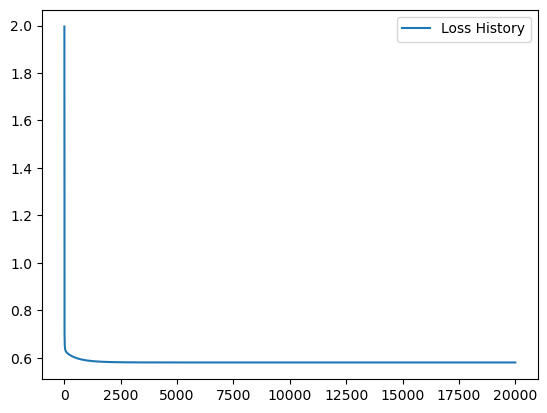

In [38]:
plt.plot(loss_history, label='Loss History')
plt.legend()
plt.show()

In [39]:
def predict(inputs, logistic_regression_weights):
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    predictions = logistic_function(inputs @ logistic_regression_weights)
    return predictions > 0.5

In [40]:
test_predictions = predict(test_inputs, logistic_regression_weights)

In [41]:
print("Accuracy: ", np.mean(test_predictions == test_true_labels))

Accuracy:  0.7053333333333334


In [42]:
print(classification_report(test_predictions, test_true_labels))

              precision    recall  f1-score   support

       False       0.71      0.91      0.79      1873
        True       0.70      0.37      0.49      1127

    accuracy                           0.71      3000
   macro avg       0.71      0.64      0.64      3000
weighted avg       0.71      0.71      0.68      3000



## Using decision trees

In [43]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
predictions = tree.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2821
           1       0.25      0.88      0.39       179

    accuracy                           0.84      3000
   macro avg       0.62      0.86      0.65      3000
weighted avg       0.95      0.84      0.88      3000



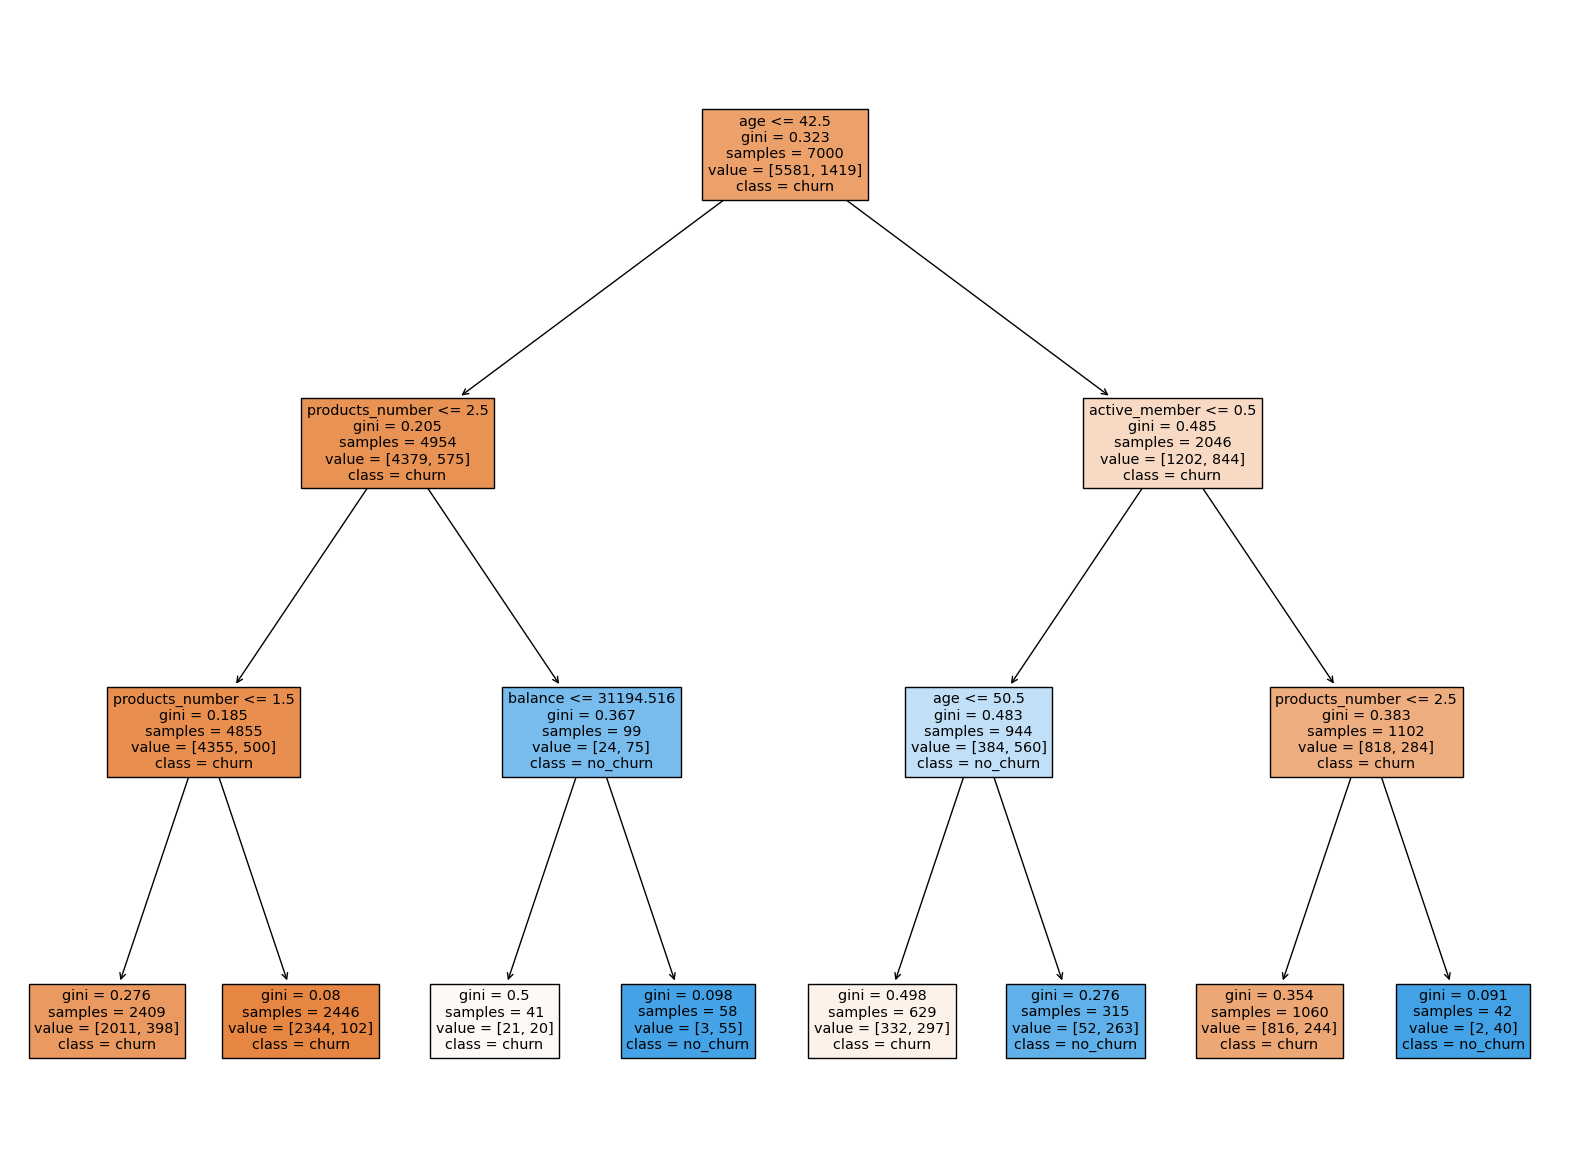

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
_ = plot_tree(tree, feature_names = list(bank.drop('churn', axis=1).columns), class_names = ['churn', 'no_churn'], filled=True)
plt.savefig('dt_depth5.png')